In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import matplotlib.pyplot as plt
from plotly import tools
from plotly.subplots import make_subplots
import scipy as sp
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import math
import xgboost
from xgboost import plot_importance
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import time

%matplotlib inline



* Preprocesado del conjunto de datos: En este apartado se reciben los archivos .CSV recopilados, y se procede a transformalos en dataframes de pandas, buscando concaternalos en un solo dataframe que permita de esta manera realizar la evaluación conjunta de todo el dataset, de esta forma evitar reprocesos y poder de manera general observar el comportamiento de los datos a lo largo del tiempo

In [2]:
#Lectura de los .CSV con pandas 

alfa=pd.read_csv('archivo.csv')
beta=pd.read_csv('archivo2.csv')

#Nota: El warning se da, porque en la columna de 'ton mes' hay unos datos que no se pueden interpretar como float, así que 
#se interpretan como Strings, lo que se hara en la parte posterior es un tratamiento especial a estos datos, para eliminarlos
#Y evitar futuros errores

C:\Users\juanc\AppData\Local\Temp\ipykernel_1844\1193410797.py:4: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
#Se revisa la cola para confirmar la correcta importación
alfa.tail(5)

,anio,mes,factura,matricula,ciclo,estrato,barrio,valor,ton mes,unidades_resd,...,tara_tafna,tara_tafa,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal
272836,2021,11,1579951.0,45552,105,4,CONJUNTO ZAPAN,44166.6000,0.107028,0,...,0.0,0.0,0,0,0,2,1,0,2,44170
272837,2021,11,1579952.0,45553,105,4,CONJUNTO ZAPAN,44166.6000,0.171303,0,...,0.0,0.0,0,0,0,2,1,0,2,44170
272838,2021,11,1579953.0,45554,105,4,CONJUNTO ZAPAN,44166.6000,0.488597,0,...,0.0,0.0,0,0,0,2,1,0,2,44170
272839,2021,11,1579954.0,45555,105,4,CONJUNTO ZAPAN,44166.6000,0.123616,0,...,0.0,0.0,0,0,0,2,1,0,2,44170
272840,2021,11,1568778.0,21596,504,3,TREBOL DE GUALI,37079.8718,0.491524,0,...,0.0,0.0,0,0,0,2,1,0,3,542070


In [4]:
#Se revisa la cola para confirmar la correcta importación
beta.tail(5)

,anio,mes,factura,matricula,ciclo,ESTRATO,BARRIO,VALOR,ton mes,unidades_resd,...,tara_tafna,tara_tafa,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal
327562,2022,11,1846862,1231,101,11,CENTRO,147689.5437,0.480174,0,...,0.27,0,0,0,0,2,1,2,3,310570
327563,2022,11,1846862,1231,101,11,CENTRO,113782.5900,0.693838,1,...,0.27,0,0,0,0,2,1,2,3,310570
327564,2022,11,1846862,1231,101,11,CENTRO,46875.8308,0.604378,2,...,0.00,0,0,0,0,2,1,2,3,310570
327565,2022,11,1847108,10397,101,11,CENTRO,117810.4200,0.66764,0,...,0.00,0,0,0,0,2,0,1,3,120930
327566,2022,11,1846061,310,101,11,CENTRO,57119.2500,0.557731,0,...,0.00,0,0,0,0,2,0,0,3,59350


Se logra observar que los encabezados de las columnas coinciden en nombre pero no en cuanto a mayusculas y minusculas por tanto, para lograr la correcta integración de los dataframes se procede a convertir todo a minuscula

In [5]:
alfa.columns=alfa.columns.str.lower()
beta.columns=beta.columns.str.lower()

#Se confirma Beta, verificando que los nombres esten en minuscula

beta.tail()

,anio,mes,factura,matricula,ciclo,estrato,barrio,valor,ton mes,unidades_resd,...,tara_tafna,tara_tafa,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal
327562,2022,11,1846862,1231,101,11,CENTRO,147689.5437,0.480174,0,...,0.27,0,0,0,0,2,1,2,3,310570
327563,2022,11,1846862,1231,101,11,CENTRO,113782.5900,0.693838,1,...,0.27,0,0,0,0,2,1,2,3,310570
327564,2022,11,1846862,1231,101,11,CENTRO,46875.8308,0.604378,2,...,0.00,0,0,0,0,2,1,2,3,310570
327565,2022,11,1847108,10397,101,11,CENTRO,117810.4200,0.66764,0,...,0.00,0,0,0,0,2,0,1,3,120930
327566,2022,11,1846061,310,101,11,CENTRO,57119.2500,0.557731,0,...,0.00,0,0,0,0,2,0,0,3,59350


In [6]:
#Se concatena Alfa y Beta, en el Dataframe a evaluar 

df=pd.concat([alfa, beta], ignore_index=True)
#Se revisa la cola del df para verificar que de manera correcta se logro el objetivo de concatenarlos
df.tail(5)

,anio,mes,factura,matricula,ciclo,estrato,barrio,valor,ton mes,unidades_resd,...,tara_tafna,tara_tafa,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal
600403,2022,11,1846862.0,1231,101,11,CENTRO,147689.5437,0.480174,0,...,0.27,0.0,0,0,0,2,1,2,3,310570
600404,2022,11,1846862.0,1231,101,11,CENTRO,113782.5900,0.693838,1,...,0.27,0.0,0,0,0,2,1,2,3,310570
600405,2022,11,1846862.0,1231,101,11,CENTRO,46875.8308,0.604378,2,...,0.00,0.0,0,0,0,2,1,2,3,310570
600406,2022,11,1847108.0,10397,101,11,CENTRO,117810.4200,0.66764,0,...,0.00,0.0,0,0,0,2,0,1,3,120930
600407,2022,11,1846061.0,310,101,11,CENTRO,57119.2500,0.557731,0,...,0.00,0.0,0,0,0,2,0,0,3,59350


In [7]:
#Se decriben las columnas del dataframe
df.describe()

,anio,mes,factura,matricula,ciclo,estrato,valor,unidades_resd,tara_cargofijo,tara_porcensubsidiocontribucio,...,tara_tafna,tara_tafa,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal
count,600408.000000,600408.000000,6.003450e+05,600408.000000,600408.000000,600408.000000,6.004080e+05,600408.000000,600408.000000,600408.000000,...,600408.000000,600408.000000,600408.0,600408.0,600408.0,600408.000000,600408.000000,600408.000000,600408.000000,6.004080e+05
mean,2021.430577,6.516797,1.587685e+06,22538.081043,359.865123,3.284708,4.550982e+04,0.042478,28443.227607,-15.211563,...,0.023612,0.001397,0.0,0.0,0.0,2.011517,0.973878,0.130789,2.714094,6.917830e+04
std,0.567132,3.663067,1.523223e+05,13285.441752,180.433856,2.027413,1.854099e+05,0.255721,4376.212414,24.181422,...,0.062826,0.005961,0.0,0.0,0.0,0.108908,0.351786,0.395400,0.457497,3.183336e+05
min,2020.000000,1.000000,1.313153e+06,1.000000,101.000000,1.000000,6.675363e+03,0.000000,14628.710000,-55.000000,...,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,-2.008100e+07
25%,2021.000000,3.000000,1.460844e+06,10830.000000,200.000000,2.000000,2.645519e+04,0.000000,27032.880000,-40.000000,...,0.000000,0.000000,0.0,0.0,0.0,2.000000,1.000000,0.000000,2.000000,3.322000e+04
50%,2021.000000,7.000000,1.596403e+06,22309.500000,401.000000,3.000000,3.707987e+04,0.000000,27061.900000,-14.000000,...,0.000000,0.000000,0.0,0.0,0.0,2.000000,1.000000,0.000000,3.000000,3.842000e+04
75%,2022.000000,10.000000,1.710389e+06,34169.000000,502.000000,4.000000,4.221696e+04,0.000000,29257.420000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,2.000000,1.000000,0.000000,3.000000,4.815000e+04
max,2022.000000,12.000000,1.859371e+06,47856.000000,802.000000,12.000000,3.066829e+07,10.000000,36536.217330,60.000000,...,0.324900,0.029200,0.0,0.0,0.0,5.000000,6.000000,9.000000,6.000000,3.831343e+07


In [8]:
#Se observa la información, lo cual permite verificar que tipo de datos se tienen y cuantos registros por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600408 entries, 0 to 600407
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   anio                            600408 non-null  int64  
 1   mes                             600408 non-null  int64  
 2   factura                         600345 non-null  float64
 3   matricula                       600408 non-null  int64  
 4   ciclo                           600408 non-null  int64  
 5   estrato                         600408 non-null  int64  
 6   barrio                          600408 non-null  object 
 7   valor                           600408 non-null  float64
 8   ton mes                         600408 non-null  object 
 9   unidades_resd                   600408 non-null  int64  
 10  tara_cargofijo                  600408 non-null  float64
 11  tara_porcensubsidiocontribucio  600408 non-null  int64  
 12  tara_cargovariab

Se logra observar que la columna número 8, posee un tipo de dato Object que es comun en cadenas de caracteres strings, pero que dicho dato se requiere sea númerico, ya que es la variable que queremos predecir siendo este la etiqueta. Así las cosas, se procede a realizar la conversión a float.

In [9]:
#Se transforma la columna número 8 en númerica, para este caso float64, y si encuentra un error lo reemplazara con un dato NaN,
df['ton mes']=pd.to_numeric(df['ton mes'], errors='coerce' )

In [10]:
#Se revisa la cantidad de errores NaN
df.isna().sum()
#Se logra observar que fue exitosa la conversión y que para el caso de la columna facturas, se cuentan con 63 registros NaN
#Debido al tamaño del dataset se podria decidir eliminar los registros NaN ya que son una pequeña fracción del total y que
#particularmente la factura es un dato arbitrario de clasificación que no guarda relación con la etiqueta y por tanto se 
#pueden eliminar. Pero debido a que no se van a utilizar en la predicción se ignoran ya que se van a omitir en los calculos de 
#Los algoritmos de Machine Learning

anio                               0
mes                                0
factura                           63
matricula                          0
ciclo                              0
estrato                            0
barrio                             0
valor                              0
ton mes                            2
unidades_resd                      0
tara_cargofijo                     0
tara_porcensubsidiocontribucio     0
tara_cargovariable                 0
tara_cargoapv                      0
tara_tbl                           0
tara_trt                           0
tara_tdf                           0
tara_tc                            0
tara_ta                            0
sub tra                            0
con tra                            0
tara_ttl                           0
tara_tlu                           0
tara_trna                          0
tara_tra                           0
tara_trbl                          0
tara_trlu                          0
t

* Procesamiento del conjunto de datos: Se convierten las variables en númericas, tales como el barrio se tokeniza para permitir la evaluación de los algoritmos seleccionados, se crean nuevas columnas como valor por tonelada, que considera el valor total de la factura divido la cantidad de toneladas, se limpian datos arbitrarios que no aportan a las predicciones de los algoritmos, tales como: Matricula y factura

In [11]:
df['barrio'].nunique()
#Se observa que a pesar de ser mas de 600mil registros, estos se dividen en pocos barrios, para el conjunto de datos, así que
#se decide cambiar sus valores de cadena de caracteres con label encoder para poder utilzarlos con los algoritmos de ML 

156

In [12]:
#Se deja este espacio para tokenizar los barrios, 
le = LabelEncoder()
df['barrio_encoded'] = le.fit_transform(df['barrio'])


In [13]:
#Se eliminan las columnas que son de clasificación arbitraria y no realizan un aporte significativo a la predicción de las toneladas 
#Defines the tag what we want to keep in the new Df
toDontKeep=['barrio']
#Drop the unwanted data 
df2=df.drop(labels=toDontKeep, axis=1)
df2.isna().sum()

anio                               0
mes                                0
factura                           63
matricula                          0
ciclo                              0
estrato                            0
valor                              0
ton mes                            2
unidades_resd                      0
tara_cargofijo                     0
tara_porcensubsidiocontribucio     0
tara_cargovariable                 0
tara_cargoapv                      0
tara_tbl                           0
tara_trt                           0
tara_tdf                           0
tara_tc                            0
tara_ta                            0
sub tra                            0
con tra                            0
tara_ttl                           0
tara_tlu                           0
tara_trna                          0
tara_tra                           0
tara_trbl                          0
tara_trlu                          0
tara_trra                          0
t

In [14]:
#Se procede a eliminar los NaN
df2.dropna(inplace=True)
df.dropna(inplace=True)
#df2.dropna(inplace=True)
#Se revisa 
df2.isna().sum()

anio                              0
mes                               0
factura                           0
matricula                         0
ciclo                             0
estrato                           0
valor                             0
ton mes                           0
unidades_resd                     0
tara_cargofijo                    0
tara_porcensubsidiocontribucio    0
tara_cargovariable                0
tara_cargoapv                     0
tara_tbl                          0
tara_trt                          0
tara_tdf                          0
tara_tc                           0
tara_ta                           0
sub tra                           0
con tra                           0
tara_ttl                          0
tara_tlu                          0
tara_trna                         0
tara_tra                          0
tara_trbl                         0
tara_trlu                         0
tara_trra                         0
tara_tafna                  

In [15]:
#Se procede a crear una nueva columna, valor tonelado total, que es producto de fact_valortotal y ton mes, por ultimo se verifica
#la cola para evidenciar que la operación fue correcta
df2['Valor ton/total']=df2['fact_valortotal']/df2['ton mes']
df['Valor ton/total']=df2['Valor ton/total']
df2.tail()

,anio,mes,factura,matricula,ciclo,estrato,valor,ton mes,unidades_resd,tara_cargofijo,...,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal,barrio_encoded,Valor ton/total
600403,2022,11,1846862.0,1231,101,11,147689.5437,0.480174,0,36416.55,...,0,0,0,2,1,2,3,310570,26,646786.129149
600404,2022,11,1846862.0,1231,101,11,113782.5900,0.693838,1,36416.55,...,0,0,0,2,1,2,3,310570,26,447611.398016
600405,2022,11,1846862.0,1231,101,11,46875.8308,0.604378,2,36416.55,...,0,0,0,2,1,2,3,310570,26,513867.346266
600406,2022,11,1847108.0,10397,101,11,117810.4200,0.667640,0,36416.55,...,0,0,0,2,0,1,3,120930,26,181130.496826
600407,2022,11,1846061.0,310,101,11,57119.2500,0.557731,0,36416.55,...,0,0,0,2,0,0,3,59350,26,106413.297282


In [16]:
# Ordenar las correlaciones en orden descendente
# Suponiendo que 'df' es tu DataFrame con las variables de interés
correlaciones = df.corrwith(df['ton mes'])
correlaciones_ordenadas = correlaciones.sort_values(ascending=False)

# Visualizar las correlaciones ordenadas
print(correlaciones_ordenadas)
#Se logran detectar variables con correlación nula respecto a la variable predictora,
#Pero despues de realizar prueba y error se detecta que dichas variables contribuyen a la capacidad predictiva de los modelos
#Y que eliminandolas, disminuye la capacidad de acierto, por tanto se confirma que correlación no indica causalidad y se 
#Conservan las columnas, aunque se deja indicado que se realizo un procedimiento para la eliminación de estas. Se procedera 
#A identificar los valores no relevantes por medio de los P valores de la regresión multiple, así se tendra una mejor argumentación

ton mes                           1.000000
valor                             0.891332
fact_valortotal                   0.504978
tara_tafna                        0.162631
estrato                           0.161955
con tra                           0.152302
tara_trt                          0.135800
tara_cargovariable                0.135216
tara_tdf                          0.133312
tara_porcensubsidiocontribucio    0.129460
info_unrh                         0.097473
tara_tafa                         0.050015
tara_tra                          0.042409
tara_cargoapv                     0.042057
tara_ta                           0.039264
sub tra                           0.024243
recoleccion                       0.015058
barrio_encoded                    0.010597
mes                               0.008245
unidades_resd                    -0.004189
frec_barrido                     -0.006870
matricula                        -0.015591
tara_trna                        -0.018007
tara_trbl  

In [17]:
#toDontKeep=['tara_ttl','tara_trra','tara_aforo','tara_tviat']
#Drop the unwanted data 
#df2=df.drop(labels=toDontKeep, axis=1)

* Espacio para el EDA: Exploratory Data analysis 

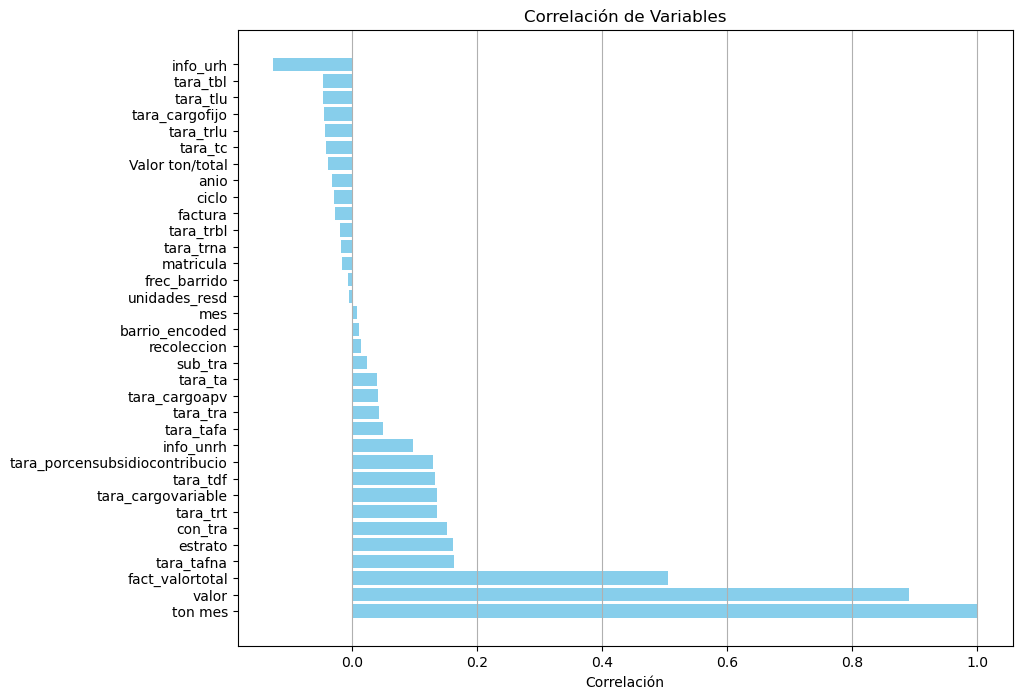

In [18]:
#Se grafica las correlaciones


# Crear un DataFrame con los datos de la tabla
data = {
    'Nombre de la variable': ['ton mes', 'valor', 'fact_valortotal', 'tara_tafna', 'estrato', 'con_tra', 'tara_trt', 'tara_cargovariable', 'tara_tdf', 'tara_porcensubsidiocontribucio', 'info_unrh', 'tara_tafa', 'tara_tra', 'tara_cargoapv', 'tara_ta', 'sub_tra', 'recoleccion', 'barrio_encoded', 'mes', 'unidades_resd', 'frec_barrido', 'matricula', 'tara_trna', 'tara_trbl', 'factura', 'ciclo', 'anio', 'Valor ton/total', 'tara_tc', 'tara_trlu', 'tara_cargofijo', 'tara_tlu', 'tara_tbl', 'info_urh', 'tara_ttl', 'tara_trra', 'tara_aforo', 'tara_tca', 'tara_tviat'],
    'Correlación': [1.000000, 0.891332, 0.504978, 0.162631, 0.161955, 0.152302, 0.135800, 0.135216, 0.133312, 0.129460, 0.097473, 0.050015, 0.042409, 0.042057, 0.039264, 0.024243, 0.015058, 0.010597, 0.008245, -0.004189, -0.006870, -0.015591, -0.018007, -0.019459, -0.027607, -0.028566, -0.032430, -0.038760, -0.040889, -0.043053, -0.045362, -0.046139, -0.046672, -0.126688, None, None, None, None, None]
}

df3 = pd.DataFrame(data)

# Filtrar valores NaN para evitar problemas en la visualización
df3 = df3.dropna(subset=['Correlación'])

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
plt.barh(df3['Nombre de la variable'], df3['Correlación'], color='skyblue')
plt.xlabel('Correlación')
plt.title('Correlación de Variables')
plt.grid(axis='x')
plt.savefig('corr2', dpi=300)
# Mostrar el gráfico
plt.show()

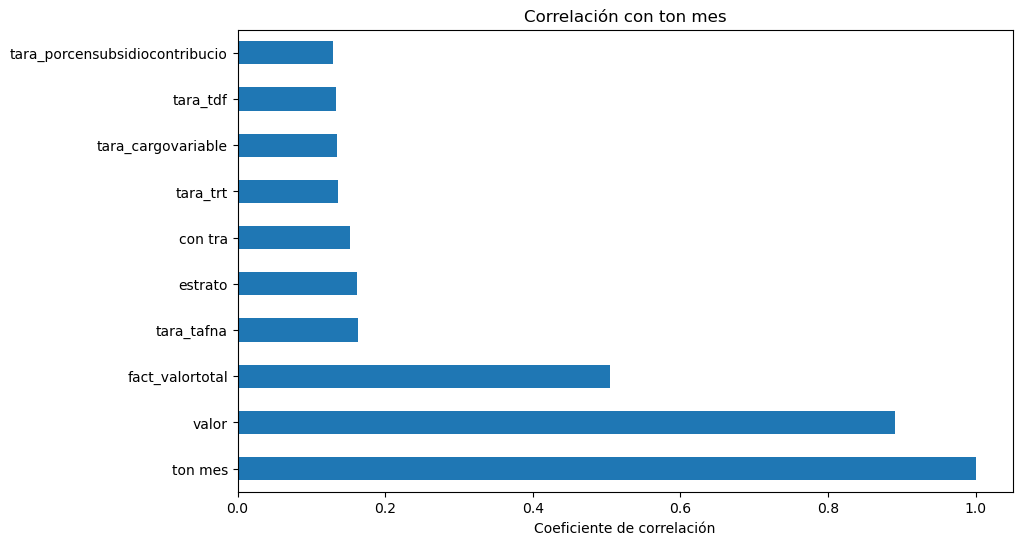

In [19]:
#Se procede a graficar las correlaciones fuertes que se encuentren entre las columanas y la etiqueta que para este caso 
#es la cantidad de toneladas mensuales recolectadas
# Seleccionar las columnas de interés
correlation_columns = ['ton mes', 'valor', 'fact_valortotal', 'tara_tafna', 'estrato', 'con tra', 'tara_trt', 'tara_cargovariable', 'tara_tdf', 'tara_porcensubsidiocontribucio']

# Crear un subconjunto del DataFrame con las columnas seleccionadas
correlation_df = df[correlation_columns]


corr_matrix = correlation_df.corr()

correlation_values = corr_matrix['ton mes'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlation_values.plot(kind='barh')
plt.title('Correlación con ton mes')
plt.xlabel('Coeficiente de correlación')
plt.savefig('corr1', dpi=300)
plt.show()



In [20]:
df.head()

,anio,mes,factura,matricula,ciclo,estrato,barrio,valor,ton mes,unidades_resd,...,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal,barrio_encoded,Valor ton/total
0,2020,12,1313156.0,4,200,2,CENTRO,24367.584,0.378640,0,...,0,0,0,2,3,0,3,73100,26,193059.484035
1,2020,12,1313156.0,4,200,2,CENTRO,24367.584,0.485894,3,...,0,0,0,2,3,0,3,73100,26,150444.213602
2,2020,12,1313156.0,4,200,2,CENTRO,24367.584,0.627676,4,...,0,0,0,2,3,0,3,73100,26,116461.299104
3,2020,12,1318377.0,42412,401,2,ALICANTE,24367.584,0.764790,0,...,0,0,0,2,1,0,2,24370,5,31864.966555
4,2020,12,1320785.0,1744,403,2,EL DORADO,24367.584,0.569061,0,...,0,0,0,2,1,1,3,77010,46,135328.245364


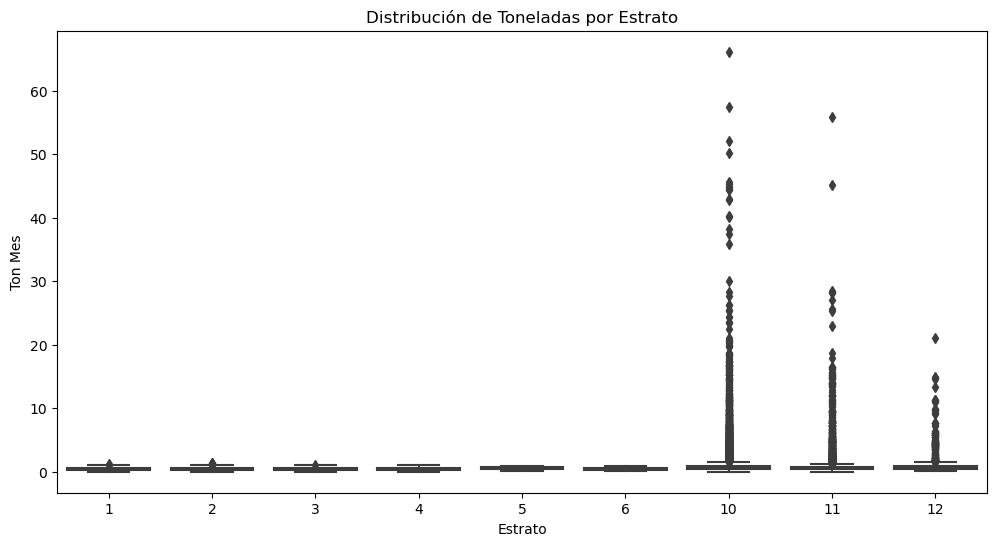

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='estrato', y='ton mes', data=df)
plt.title('Distribución de Toneladas por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Ton Mes')
plt.savefig('ToneladasxEstrato', dpi=300)
plt.show()
#10 es comercial 
#11 es industrial
#12 es oficial 

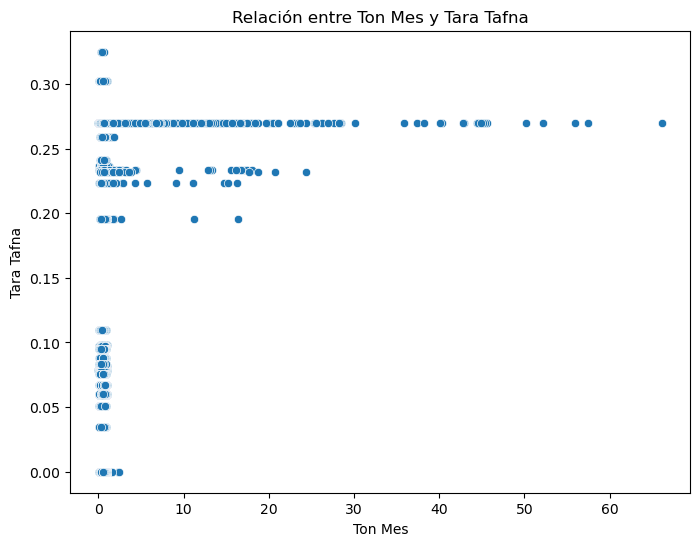

In [22]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ton mes', y='tara_tafna', data=df)
plt.title('Relación entre Ton Mes y Tara Tafna')
plt.xlabel('Ton Mes')
plt.ylabel('Tara Tafna')
plt.savefig('ToneladasxTafna', dpi=300)
plt.show()


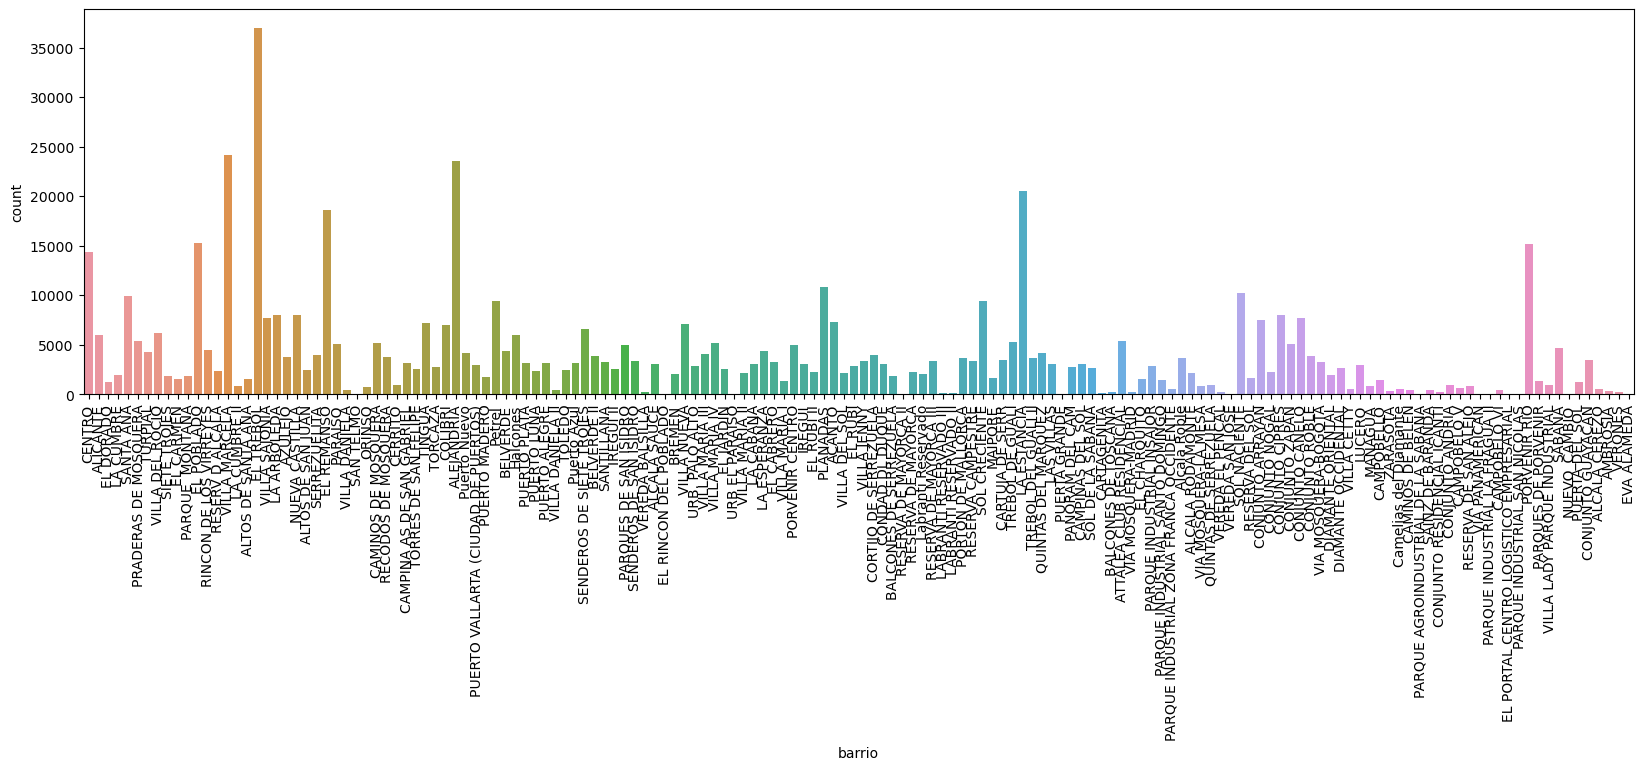

In [23]:
#Plot general de conteo respecto a los barrios
plt.figure(figsize=(20,5))
sns.countplot(x='barrio',data=df)
plt.xticks(rotation=90)
plt.show()

#Como se logra observar, dada la cantidad tan grande de barrios, la información no es clara, por tanto se procede a mostrar
#los más relevantes

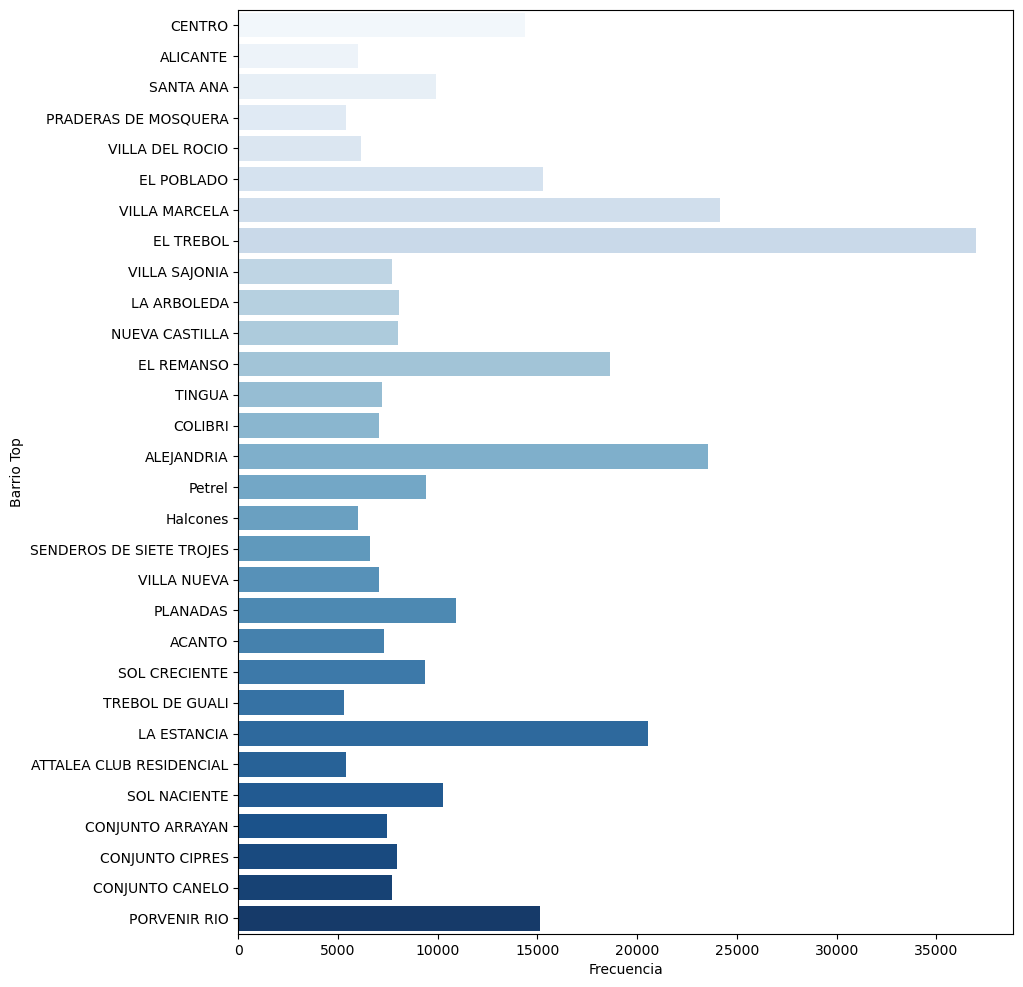

In [24]:
# Seleccionar los N barrios más frecuentes
top_n = 30
top_barrios = df['barrio'].value_counts().nlargest(top_n).index

# Crear una nueva columna 'barrio_top' que agrupa barrios menos frecuentes bajo 'Otros'
df['barrio_top'] = df['barrio'].apply(lambda x: x if x in top_barrios else 'Otros')

# Eliminar 'Otros' para visualizar claramente el top 30
df_top_30 = df[df['barrio_top'] != 'Otros'].copy()

# Crear el gráfico de barras con ejes intercambiados y tonos azules
plt.figure(figsize=(10, 12))
sns.countplot(y='barrio_top', data=df_top_30, palette='Blues')  # Añadí 'palette'
plt.xticks(rotation=0)
plt.ylabel('Barrio Top')
plt.xlabel('Frecuencia')
plt.savefig('Barriotop', dpi=300)
plt.show()



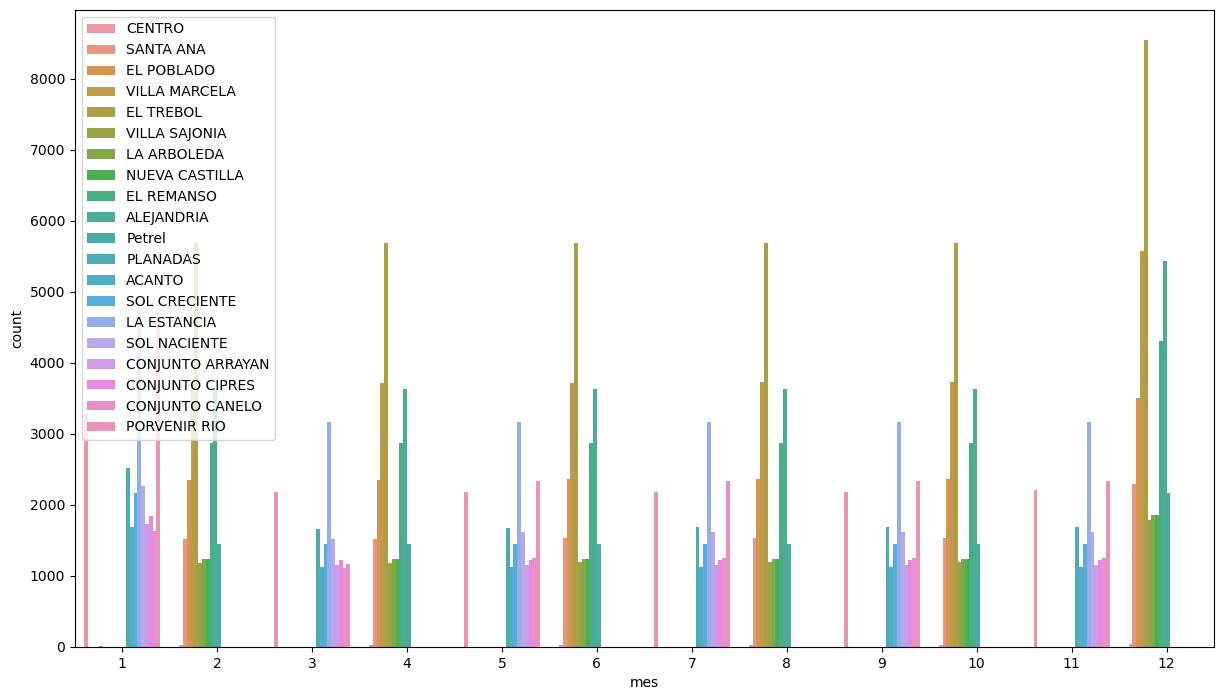

In [25]:
# Seleccionar los N barrios más frecuentes

top_n = 20
top_barrios = df['barrio'].value_counts().nlargest(top_n).index
df['barrio_top'] = df['barrio'].apply(lambda x: x if x in top_barrios else 'Otros')

# Eliminar 'Otros' para visualizar claramente el top 40
#df_top_40 = df[df['barrio_top'] != 'Otros'].copy()
df = df.loc[df['barrio_top'] != 'Otros'].copy()

plt.figure(figsize=(14.7, 8.27))

ax = sns.countplot(x='mes', data=df, hue='barrio_top')
plt.xticks(rotation=0)

# Mover la leyenda a la izquierda del gráfico
ax.legend(bbox_to_anchor=(0, 1), loc='upper left')

plt.show()


In [26]:
# Para una aproximación exacta de la grafica anterior se procede a 
# Agrupar por mes y sumar las toneladas
resultados = df.groupby('mes')['ton mes'].sum().reset_index()

# Ordenar los resultados por mes en orden descendente
resultados_ordenados = resultados.sort_values(by='mes', ascending=True)

print(resultados_ordenados)


    mes       ton mes
0     1  13141.066622
1     2  12236.678394
2     3   7911.355144
3     4  12411.914594
4     5   6311.595053
5     6  10332.958739
6     7   8280.658845
7     8  12416.339518
8     9   8731.395405
9    10  12346.548991
10   11   8685.726079
11   12  18316.018035


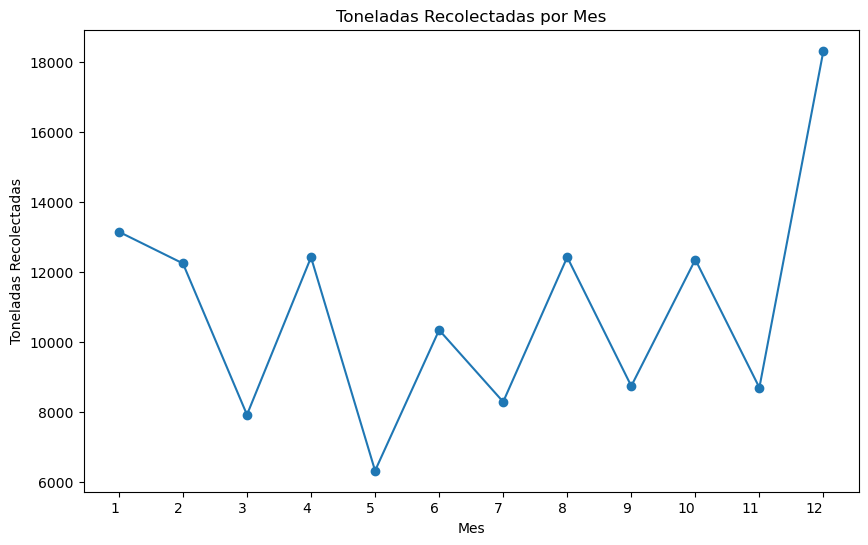

In [27]:
#Graficamente se tiene: 
    
# Crear un gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(resultados['mes'], resultados_ordenados['ton mes'], marker='o')
plt.xlabel('Mes')
plt.ylabel('Toneladas Recolectadas')
plt.title('Toneladas Recolectadas por Mes')
plt.xticks(rotation=0, ha='right', ticks=resultados_ordenados['mes'])
plt.savefig('ToneladasxMes', dpi=300)
plt.show()

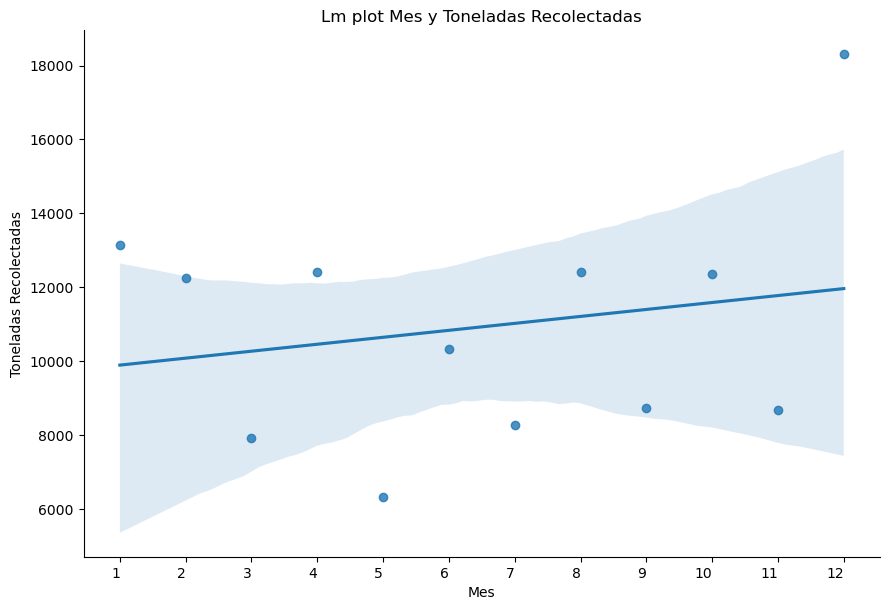

In [28]:
#Se crea yb grafico de dispersión con una linea de regresión lineal, lo que visualmente ayuda a catalogar ciertos datos atipicos
sns.lmplot(x='mes', y='ton mes', data=resultados_ordenados, height=6, aspect=1.5)
plt.xlabel('Mes')
plt.ylabel('Toneladas Recolectadas')
plt.title('Lm plot Mes y Toneladas Recolectadas')
plt.xticks(rotation=0, ha='right', ticks=resultados_ordenados['mes'])
plt.show()
#Se logra observar que particularmente diciembre es un mes atipico, y que las toneladas recolectadas incrementan considerablemente
#Es tanta su fuerza que se conserva un poco de ese moviento en enero, cuando se empieza a regularizar la recolección, y ya en
#mayo y julio se observan los meses con menor recolección lo que podria tal vez coincidir con periodos bajos de producción,
#Que son la preparación para los movimientos decembrinos

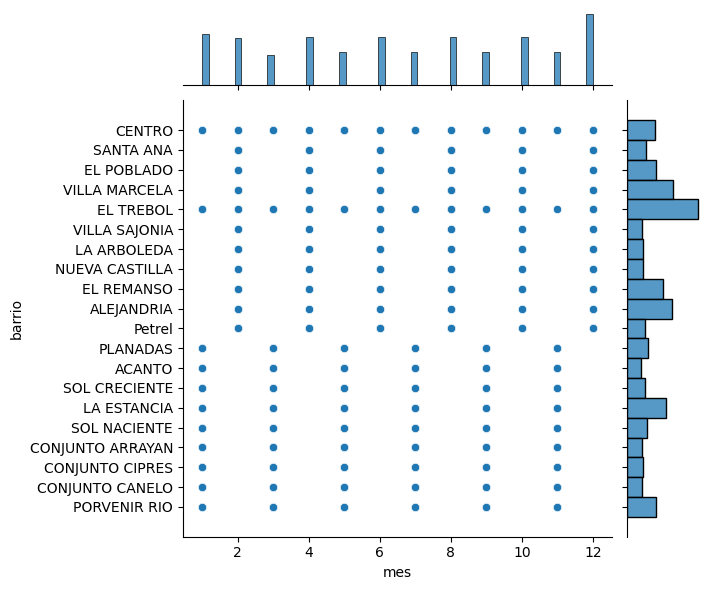

In [29]:
#Se crea un Jointplot entre los meses y los barrios, lo que permite visualizar la relación entre las dos variables
sns.jointplot(x='mes',y='barrio', data=df)
plt.xticks(rotation=0, ha='right', ticks=resultados_ordenados['mes'])
plt.show()
#Se logra observar la relación entre las variables, y barrios que aportan grandes cantidades a la recolección como Centro y Trebol
#Vs otros barrios que no aportan tanto y figuran de forma bimensual

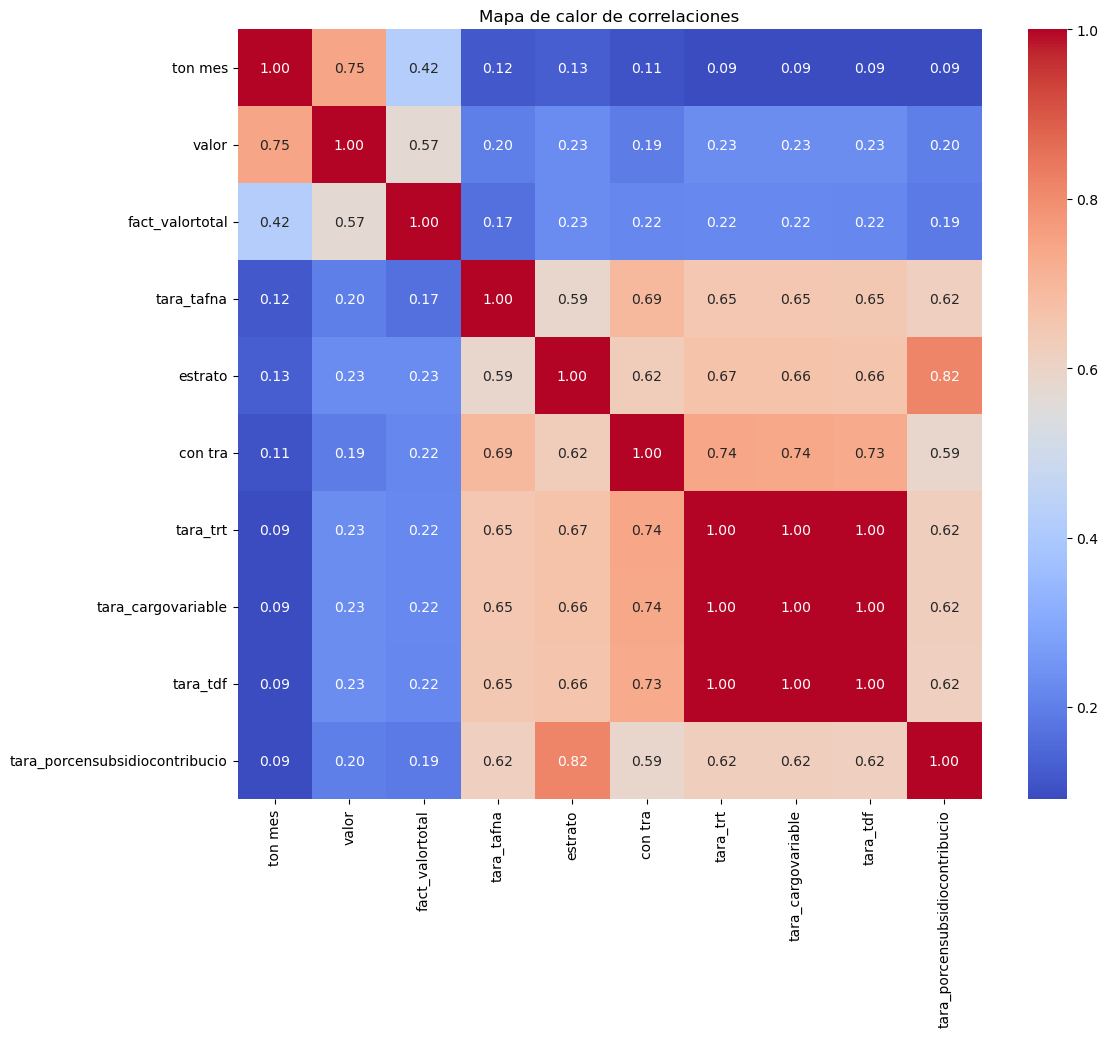

In [30]:
#Se procede a graficar las correlaciones fuertes que se encuentren entre las columanas y la etiqueta que para este caso 
#es la cantidad de toneladas mensuales recolectadas
# Seleccionar las columnas de interés
correlation_columns = ['ton mes', 'valor', 'fact_valortotal', 'tara_tafna', 'estrato', 'con tra', 'tara_trt', 'tara_cargovariable', 'tara_tdf', 'tara_porcensubsidiocontribucio']

# Crear un subconjunto del DataFrame con las columnas seleccionadas
correlation_df = df[correlation_columns]

# Crear un mapa de calor para visualizar las correlaciones
corr_matrix = correlation_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.savefig('Heatmap', dpi=300)
plt.show()



In [31]:
# Al igual que con la matriz de correlaciones y por la cantidad de datos encontrada en el dataframe, se establece un umbral
# arbitrario y se grafican las correlaciones que lo superen respecto a la etiqueta toneladas mensuales

#corr_matrix = df.corr()

# Establecer un umbral de correlación (puedes ajustar este valor según tus necesidades)
#umbral_correlacion = 0.1

# Filtrar las variables que tienen una correlación fuerte con 'ton mes'
#variables_fuertes = corr_matrix['ton mes'][abs(corr_matrix['ton mes']) > umbral_correlacion].index

# Crear un pair plot con las variables relevantes sin muestrear
#sns.pairplot(df, vars=variables_fuertes)
#plt.suptitle('Pair Plot Variables Relevantes Toneladas Mensuales', y=1.02)
#plt.savefig('Pairplot', dpi=300)
#plt.show()


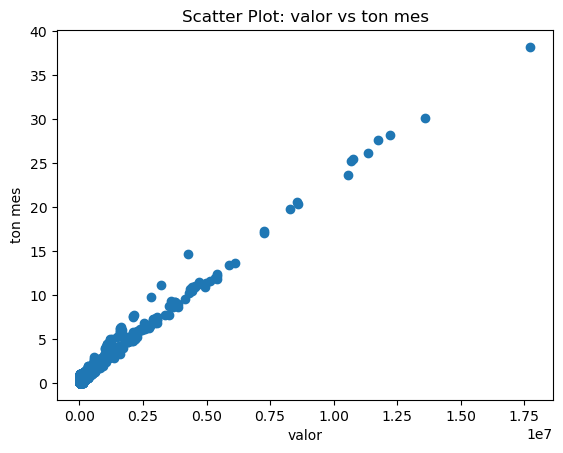

In [32]:
#Se realiza un scatter plot respecto a el valor y las toneladas mes, como se puede inferir analiticamente, a mayor cantidad de
#toneldas recolectadas, mayor es el valor de la facturación realizada
plt.scatter(df['valor'], df['ton mes'])
plt.xlabel('valor')
plt.ylabel('ton mes')
plt.title('Scatter Plot: valor vs ton mes')
plt.show()


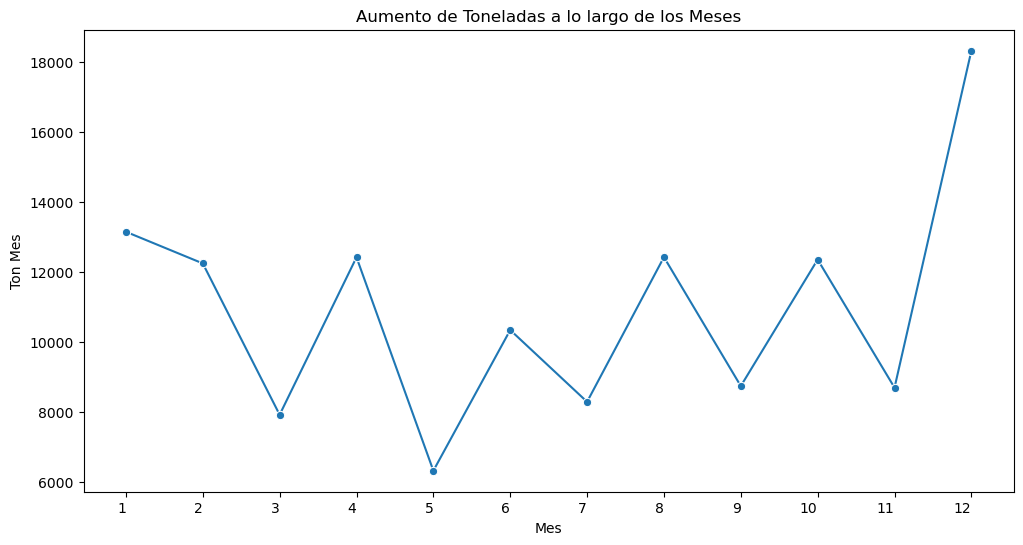

()

In [33]:
# Agrupar por mes y sumar 'ton_mes' para cada mes
ton_mes_por_mes = df.groupby('mes')['ton mes'].sum().reset_index()

# Crear un gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='ton mes', data=ton_mes_por_mes, marker='o')
plt.xlabel('Mes')
plt.ylabel('Ton Mes')
plt.title('Aumento de Toneladas a lo largo de los Meses')
plt.xticks(rotation=0, ha='right', ticks=resultados_ordenados['mes'])
plt.show()
()
#Se puede observar el comportamiento de la recolección a lo largo de los meses, y se detecta una tendecia alcista alrededor del 
#mes 5 con picos cada vez mas altos y bajos cada vez mas bajos, hasta el mes 8, donde se estabilizan los bajos y para el mes 12
#se disparan los altos, para despues entrar en tendencia bajista para el proximo año

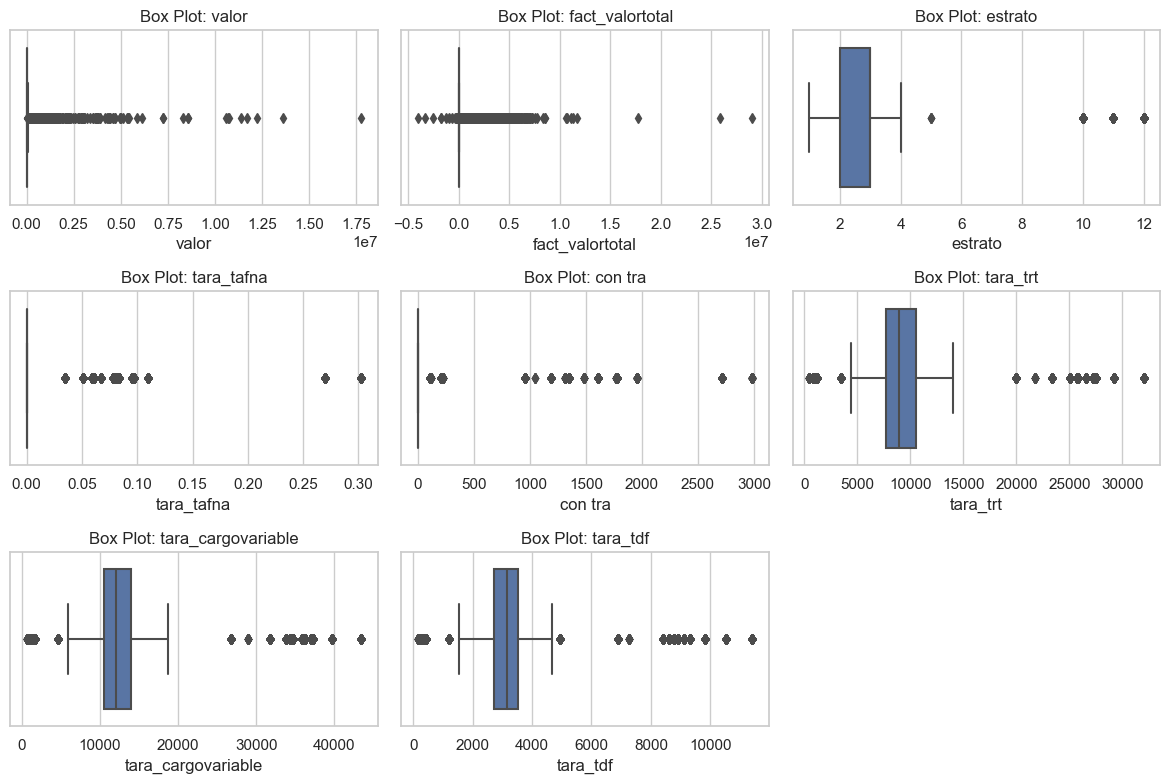

In [34]:
#Se procede a crear una serie de boxplots que puedan ayudar a realizar el analisis grafico
# Lista de variables para crear box plots
variables_interes = ['valor', 'fact_valortotal', 'estrato', 'tara_tafna', 'con tra', 'tara_trt', 'tara_cargovariable', 'tara_tdf']

# Crear box plots para cada variable
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Estilo de los box plots

for variable in variables_interes:
    plt.subplot(3, 3, variables_interes.index(variable) + 1)  # 3 filas, 3 columnas
    sns.boxplot(x=variable, data=df)
    plt.title(f'Box Plot: {variable}')

plt.tight_layout()
plt.show()

#Se logra observar que por ejemplo la concentración de estratos es alrededor del 2 y el 3, por tanto se puede inferir que es 
#Esta población quien más aporta a la generación de residuos solidos,  tambien que la tarifa con cargo variable oscila se concentra
#Entre los $10.000 y $14.000 pesos, lo que se relaciona directamente con la estratificación, pues tipicamente y por experiencia
#en estos estratos, se encuentran Variaciones mensuales entre esos valores.


* Selección de algoritmos:  Una vez realizado el EDA, así como el procesamiento de datos, se puede decir que el dataset se encuentra preparado para utilizar los algoritmos de Machine Learning. Partiendo de los referentes teóricos* y todo el trabajo mancomunado de la comunidad de científicos de datos que han realizado aportes a rubros similares, se logra detectar que los algoritmos que usualmente se utilizan para este tipo de problemas son aquellos del tipo Supervisado, es decir, aquellos que tienen las etiquetas y que pueden comparar directamente los resultados con un conjunto de datos de predicción y entrenamiento. Partiendo del enfoque anterior y de la cantidad de datos que se tiene y que dentro de esta cantidad se tiene la cantidad de toneladas recolectadas y que particularmente este es el dato que se requiere predecir pues conociéndolo le permite a la organización desarrollar una serie de estrategias que podrían tener impactos positivos en el tiempo, frecuencia, y dinero invertido en la recolección, se seleccionan las toneladas como la Etiqueta y las demás variables como predictoras pues es con ellas que se pretende predecir, en gran medida, el comportamiento de las toneladas recolectadas.

* Desarrollo de los algoritmos: 


## Regresión multiple:

In [35]:
#se dropea la etiqueta y se asignan las demás variables a X
X=df2.drop(['ton mes','Valor ton/total'],axis=1) 
#originalmente lo habia hecho asi: a.columns.drop('Total') Pero arroja un error, entonces si esto sucede, se sugiere
#cambiar de notación
y=df2['ton mes']

In [36]:

#Con train_test_split realizamos la división del conjunto de datos entre train y test, dejando para train 200 muestras y para
#Test lo demas, la semilla la dejamos por default, y por ultimo se verifica el tamaño del conjunto de entramiento, para así
#Evidenciar que se cumple con lo requerido en el ejercicio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)
X_train.shape

(180102, 37)

In [37]:
#Se crea el modelo de regresión lineal múltiple, y lo ajustamos con la data creada en el train_test_split
modelo_rm = LinearRegression()
modelo_rm.fit(X_train,y_train)

LinearRegression()

In [38]:
## definir matriz de diseño y variable respuesta
X = X_train
y = y_train

# añadir intercepto
X2 = sm.add_constant(X)

# ajustar el modelo
est = sm.OLS(endog=y, exog=X2).fit()
# ver ajuste
est.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ton mes   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 2.216e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:47:03   Log-Likelihood:                 28021.
No. Observations:              180102   AIC:                        -5.598e+04
Df Residuals:                  180069   BIC:                        -5.564e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            222.4205     46.637      4.769      0.000     131.014     313.827
anio                              -0.1098      0.023     -4.747      0.000      -0.155      -0.064
mes                               -0.0103      0.002     -5.332      0.000      -0.014      -0.007
factura                         1.294e-07   8.36e-08      1.549      0.121   -3.44e-08    2.93e-07
matricula                      -1.753e-07   6.45e-08     -2.716      0.007   -3.02e-07   -4.88e-08
ciclo                          -4.588e-05   3.43e-06    -13.383      0.000   -5.26e-05   -3.92e-05
estrato                            0.0046      0.001      7.634      0.000       0.003       0.006
valor                           2.305e-06   3.53e-09    653.426      0.000     2.3e-06    2.31e-06
unidades_resd                      0.0021      0.003      0.821      0.411      -0.003       0.007
tara_cargofijo                    -4.6292      0.288    -16.058      0.000      -5.194      -4.064
tara_porcensubsidiocontribucio    -0.0011   6.88e-05    -16.097      0.000      -0.001      -0.001
tara_cargovariable                 0.5799      0.132      4.409      0.000       0.322       0.838
tara_cargoapv                   -3.28e-05   5.62e-06     -5.837      0.000   -4.38e-05   -2.18e-05
tara_tbl                           4.6283      0.288     16.054      0.000       4.063       5.193
tara_trt                          -0.5799      0.132     -4.409      0.000      -0.838      -0.322
tara_tdf                          -0.5800      0.132     -4.409      0.000      -0.838      -0.322
tara_tc                            4.6295      0.288     16.059      0.000       4.064       5.195
tara_ta                        -1.177e-05   5.33e-06     -2.209      0.027   -2.22e-05   -1.33e-06
sub tra                        -1.799e-06   1.51e-06     -1.189      0.234   -4.76e-06    1.17e-06
con tra                         9.662e-06   2.16e-06      4.483      0.000    5.44e-06    1.39e-05
tara_ttl                        1.256e-09   5.77e-11     21.770      0.000    1.14e-09    1.37e-09
tara_tlu                           4.6294      0.288     16.058      0.000       4.064       5.194
tara_trna                          0.0181      0.004      4.867      0.000       0.011       0.025
tara_tra                           1.4386      0.149      9.676      0.000       1.147       1.730
tara_trbl                        363.0608     15.921     22.804      0.000     331.856     394.266
tara_trlu                         -4.5522      4.076     -1.117      0.264     -12.542       3.437
tara_trra                       4.605e-11   2.22e-12     20.705      0.000    4.17e-11    5.04e-11
tara_tafna                         0.1093      0.015      7.110      0.000       0.079       0.139
tara_tafa     

In [39]:
#Segun lo obtenido se procede a ejecutar un algoritmo del tipo StepWise, para eliminar aquellos valores no tan significativos y 
#Así observar el nuevo desempeño del modelo 

#Para cumplir con lo anterior, se procede a definir una función stepwise, que recibe un modelo ajustado con sm.Ols, así como la
#data de entramiento requerida para ajustar el modelo una vez se hayan eliminado los P valores < 0.05
def stepwise(est, X_train,y_train):
    #Se declara una lista vacia, que almacenara los indices de las columnas a eliminar
    pindex=[]
    #Se itera a traves de la lista con los p valores
    for i in range(0,len(est.pvalues)):
        #Se verifica si son mayores a 0.05
        if est.pvalues[i] > 0.05:
            #Se alamacena en una lista el indice
            pindex.append(i)
    #Se modifica la data de entramiento, eliminando por medio de np.delete() las columnas con los pvalores >0.05
    try:
        X_train=np.delete(X_train,pindex,axis=1)
    #Se ajusta un nuevo modelo con la data procesada
    except:
        est2 = sm.OLS(endog=y_train, exog=X_train).fit()
    #Retorna el modelo
    return est2

In [40]:
#Se llama a la función stepwise con lo requerido para su funcionamiento
st=stepwise(est,X_train,y_train)
#Se imprime el summary() Para verificar si se realizo lo requerido. Se observa que, efectivamente, se eliminaron los
#p valores >0.05 pero que se modifico negativamente el R-squared, esto se puede deber particularmente a que los datos se 
#analizan en conjunto y aunque particularmente exista un p value >0.05 Si esté es cercano, podria omitirse su modificación 
#Para evitar alterar negativamente el R-squared.
st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ton mes   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 2.287e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:47:03   Log-Likelihood:                 28010.
No. Observations:              180102   AIC:                        -5.596e+04
Df Residuals:                  180070   BIC:                        -5.563e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
anio                               0.0005   1.42e-05     36.319      0.000       0.000       0.001
mes                               -0.0011      0.000     -6.833      0.000      -0.001      -0.001
factura                        -2.623e-07   1.55e-08    -16.942      0.000   -2.93e-07   -2.32e-07
matricula                      -7.852e-08   6.13e-08     -1.282      0.200   -1.99e-07    4.15e-08
ciclo                           -4.93e-05   3.35e-06    -14.703      0.000   -5.59e-05   -4.27e-05
estrato                            0.0045      0.001      7.542      0.000       0.003       0.006
valor                           2.305e-06   3.53e-09    653.393      0.000     2.3e-06    2.31e-06
unidades_resd                      0.0018      0.003      0.694      0.488      -0.003       0.007
tara_cargofijo                    -4.6090      0.288    -15.988      0.000      -5.174      -4.044
tara_porcensubsidiocontribucio    -0.0011   6.86e-05    -16.542      0.000      -0.001      -0.001
tara_cargovariable                 0.6250      0.131      4.764      0.000       0.368       0.882
tara_cargoapv                  -3.327e-05   5.62e-06     -5.922      0.000   -4.43e-05   -2.23e-05
tara_tbl                           4.6081      0.288     15.985      0.000       4.043       5.173
tara_trt                          -0.6250      0.131     -4.764      0.000      -0.882      -0.368
tara_tdf                          -0.6250      0.131     -4.764      0.000      -0.882      -0.368
tara_tc                            4.6093      0.288     15.990      0.000       4.044       5.174
tara_ta                        -1.203e-05   5.33e-06     -2.257      0.024   -2.25e-05   -1.58e-06
sub tra                        -2.039e-06   1.51e-06     -1.349      0.177      -5e-06    9.24e-07
con tra                         9.955e-06   2.15e-06      4.621      0.000    5.73e-06    1.42e-05
tara_ttl                        9.645e-10    4.3e-11     22.415      0.000     8.8e-10    1.05e-09
tara_tlu                           4.6091      0.288     15.989      0.000       4.044       5.174
tara_trna                          0.0170      0.004      4.575      0.000       0.010       0.024
tara_tra                           1.4440      0.149      9.712      0.000       1.153       1.735
tara_trbl                        371.3624     15.827     23.464      0.000     340.343     402.382
tara_trlu                         -3.1221      4.065     -0.768      0.443     -11.090       4.846
tara_trra                        8.74e-12   4.31e-13     20.299      0.000     7.9e-12    9.58e-12
tara_tafna                         0.1050      0.015      6.840      0.000       0.075       0.135
tara_tafa                          0.9385      0.107      8.795      0.000       0.729       1.148
tara_aforo    

      Score  R2 Train   R2 Test  RMSE Train  RMSE Test  MAE Train  MAE Test  \
0  0.815856  0.797506  0.815856    0.207106   0.206085   0.170259  0.170426   

   MAPE Train  MAPE Test  
0    1.284676   1.255433  


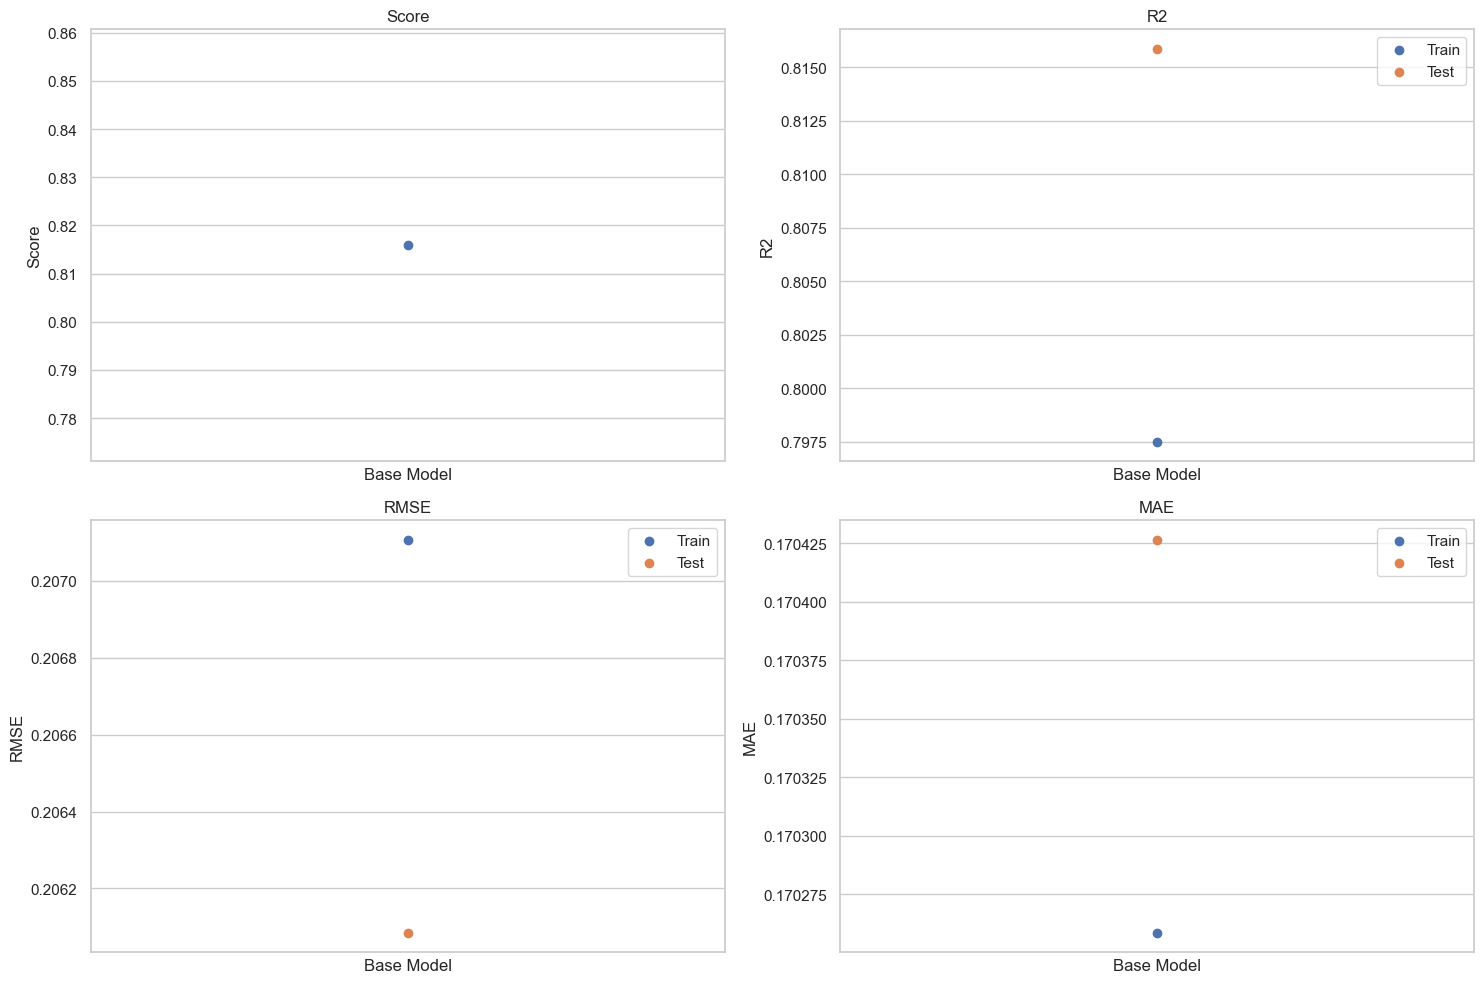

In [74]:

# Se calcula el tiempo inicial
start_time = time.time()

# Listas para almacenar resultados
scores = []
r2_train_preds = []
r2_test_preds = []
rmse_train_preds = []
rmse_test_preds = []
mae_train_preds = []
mae_test_preds = []
mape_train_preds = []
mape_test_preds = []

# Crear el modelo de Regresión Lineal Múltiple
linear_regressor = LinearRegression()

# Entrenar el modelo
linear_regressor.fit(X_train, y_train)

# Calcular el score base
score_base = linear_regressor.score(X_test, y_test)
scores.append(score_base)

# Realizar predicciones base
y_train_pred_base = linear_regressor.predict(X_train)
y_test_pred_base = linear_regressor.predict(X_test)

# Calcular R2, RMSE, MAE y MAPE base para conjuntos de entrenamiento y prueba
r2_train_base = metrics.r2_score(y_train, y_train_pred_base)
r2_train_preds.append(r2_train_base)

r2_test_base = metrics.r2_score(y_test, y_test_pred_base)
r2_test_preds.append(r2_test_base)

rmse_train_base = np.sqrt(mean_squared_error(y_train, y_train_pred_base))
rmse_train_preds.append(rmse_train_base)

rmse_test_base = np.sqrt(mean_squared_error(y_test, y_test_pred_base))
rmse_test_preds.append(rmse_test_base)

mae_train_base = metrics.mean_absolute_error(y_train, y_train_pred_base)
mae_train_preds.append(mae_train_base)

mae_test_base = metrics.mean_absolute_error(y_test, y_test_pred_base)
mae_test_preds.append(mae_test_base)

mape_train_base = np.mean(np.abs((y_train - y_train_pred_base) / y_train)) 
mape_train_preds.append(mape_train_base)

mape_test_base = np.mean(np.abs((y_test - y_test_pred_base) / y_test)) 
mape_test_preds.append(mape_test_base)

# Crear un DataFrame con los resultados base
df_resultados_linear_regression = pd.DataFrame({
    'Score': scores,
    'R2 Train': r2_train_preds,
    'R2 Test': r2_test_preds,
    'RMSE Train': rmse_train_preds,
    'RMSE Test': rmse_test_preds,
    'MAE Train': mae_train_preds,
    'MAE Test': mae_test_preds,
    'MAPE Train': mape_train_preds,
    'MAPE Test': mape_test_preds
})

# Imprimir el DataFrame base
print(df_resultados_linear_regression)

# Se calcula el tiempo después de la primera ejecución
end_time = time.time()
# Se restan los tiempos y se obtiene el tiempo total, sin contar el tiempo empleado en las gráficas
execution_timeL = end_time - start_time

# Crear subgráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de Score
ax1.scatter([0], scores, marker="o")  # Solo un punto para la regresión lineal
ax1.set_title('Score')
ax1.set_xticks([])
ax1.set_xlabel('Base Model')
ax1.set_ylabel('Score')

# Gráfico de R2
ax2.scatter([0], r2_train_preds, marker="o", label="Train")
ax2.scatter([0], r2_test_preds, marker="o", label="Test")
ax2.legend(loc='upper right')
ax2.set_title('R2')
ax2.set_xticks([])
ax2.set_xlabel('Base Model')
ax2.set_ylabel('R2')

# Gráfico de RMSE
ax3.scatter([0], rmse_train_preds, marker="o", label="Train")
ax3.scatter([0], rmse_test_preds, marker="o", label="Test")
ax3.legend(loc='upper right')
ax3.set_title('RMSE')
ax3.set_xticks([])
ax3.set_xlabel('Base Model')
ax3.set_ylabel('RMSE')

# Gráfico de MAE
ax4.scatter([0], mae_train_preds, marker="o", label="Train")
ax4.scatter([0], mae_test_preds, marker="o", label="Test")
ax4.legend(loc='upper right')
ax4.set_title('MAE')
ax4.set_xticks([])
ax4.set_xlabel('Base Model')
ax4.set_ylabel('MAE')

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

plt.show()


## Arboles de decisión

In [72]:
# Cálculo del MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

# Predicciones en conjuntos de entrenamiento y prueba
y_arbol_pred_train = arbol_regressor.predict(X_train)
y_arbol_pred_test = arbol_regressor.predict(X_test)

# Métricas de Evaluación
arbol_MAE_train = mean_absolute_error(y_train, y_arbol_pred_train)
arbol_MAE_test = mean_absolute_error(y_test, y_arbol_pred_test)

arbol_RMSE_train = np.sqrt(mean_squared_error(y_train, y_arbol_pred_train))
arbol_RMSE_test = np.sqrt(mean_squared_error(y_test, y_arbol_pred_test))

arbol_r2_train = metrics.r2_score(y_train, y_arbol_pred_train)
arbol_r2_test = metrics.r2_score(y_test, y_arbol_pred_test)

arbol_adj_r2_train = 1 - ((1 - arbol_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
arbol_adj_r2_test = 1 - ((1 - arbol_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

# Cálculo del MAPE
arbol_mape_train = mean_absolute_percentage_error(y_train, y_arbol_pred_train)
arbol_mape_test = mean_absolute_percentage_error(y_test, y_arbol_pred_test)

# Crear un DataFrame con las métricas de evaluación
arbol_metrics_df = pd.DataFrame({
    'Conjunto': ['Entrenamiento', 'Prueba'],
    'MAE': [arbol_MAE_train, arbol_MAE_test],
    'RMSE': [arbol_RMSE_train, arbol_RMSE_test],
    'R2': [arbol_r2_train, arbol_r2_test],
    'R2 Ajustado': [arbol_adj_r2_train, arbol_adj_r2_test],
    'MAPE': [arbol_mape_train, arbol_mape_test]
})

print(arbol_metrics_df)

end_time = time.time()
execution_timeA = end_time - start_time



        Conjunto       MAE      RMSE        R2  R2 Ajustado      MAPE
0  Entrenamiento  0.005181  0.029013  0.996026     0.996025  0.014466
1         Prueba  0.208564  0.289627  0.636300     0.636268  0.627589


    Profundidad Máxima  R2 Train   R2 Test  RMSE Train  RMSE Test  CV R2 Train
0                    1  0.450066  0.458118    0.341305   0.353524     0.429871
1                    2  0.689524  0.622696    0.256449   0.294993     0.644206
2                    3  0.759743  0.712366    0.225593   0.257565     0.705746
3                    4  0.786034  0.709572    0.212892   0.258813     0.733418
4                    5  0.811788  0.735781    0.199669   0.246859     0.748230
5                    6  0.818529  0.741337    0.196061   0.244250     0.761585
6                    7  0.823800  0.763042    0.193193   0.233777     0.771190
7                    8  0.830794  0.750493    0.189319   0.239888     0.775786
8                    9  0.833661  0.790159    0.187709   0.219994     0.786641
9                   10  0.836127  0.786612    0.186312   0.221846     0.776794
10                  11  0.837948  0.755003    0.185274   0.237710     0.775771
11                  12  0.838957  0.753686    0.1846

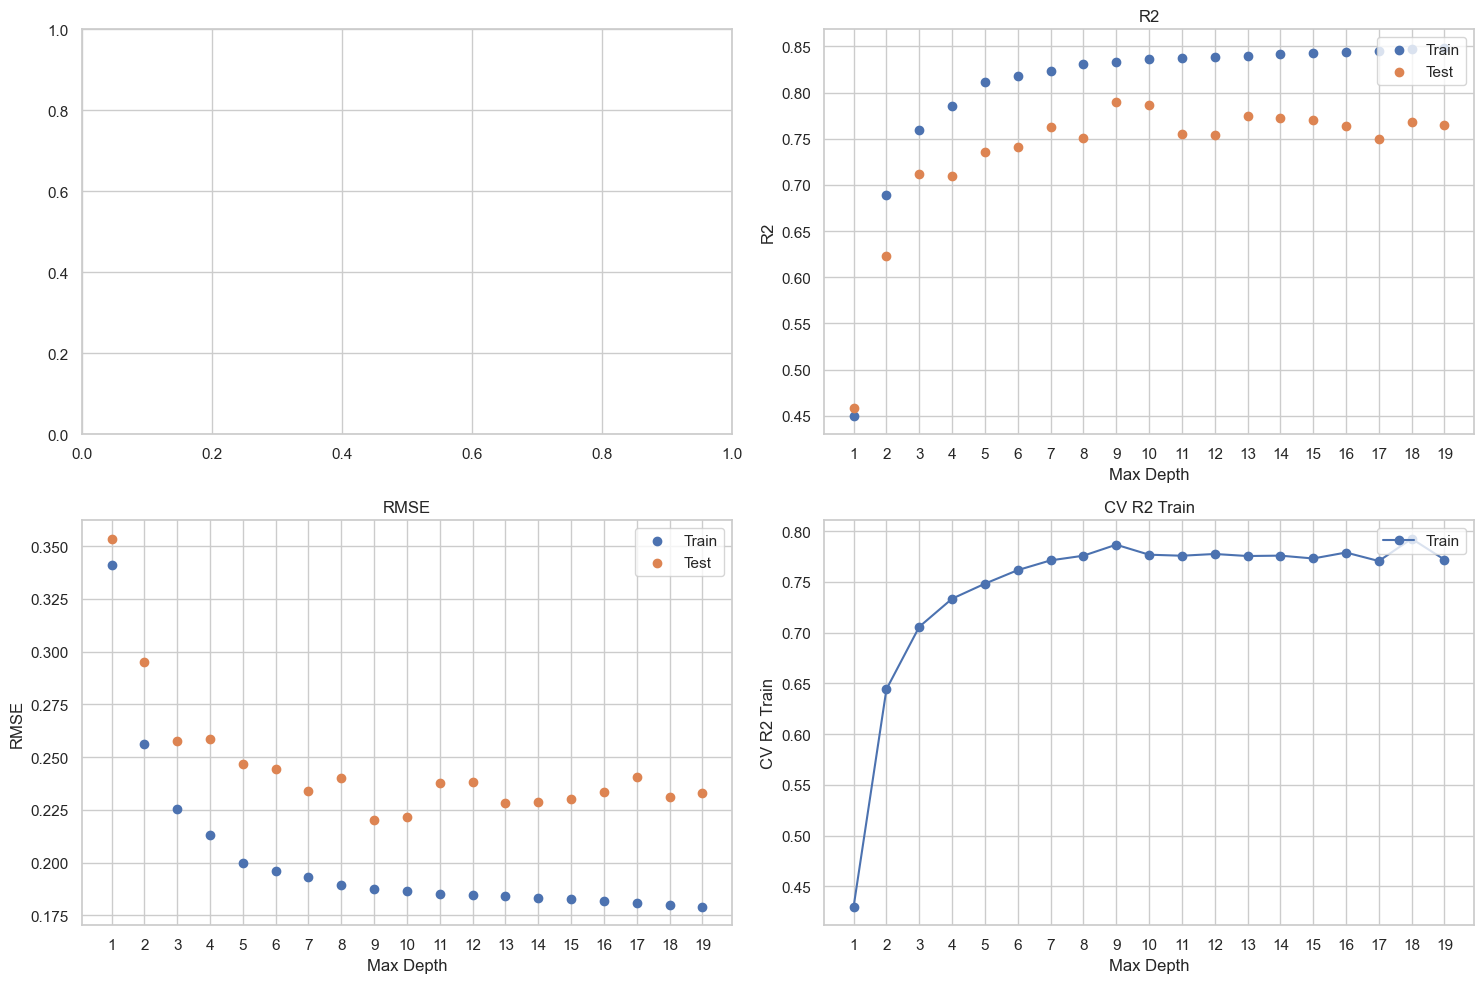

In [43]:
start_time = time.time()

# Definir el rango de profundidades
depth_range = range(1, 20)

# Listas para almacenar resultados
scores = []
r2_train_preds = []
r2_test_preds = []
rmse_train_preds = []
rmse_test_preds = []

# Listas para almacenar resultados de validación cruzada
cv_scores_train = []
cv_scores_test = []

for depth in depth_range:
    # Modelo de Árbol de Decisión
    tree_regressor = DecisionTreeRegressor(max_depth=depth, random_state=7)
    
    # Realizar validación cruzada
    cv_scores = cross_val_score(tree_regressor, X_train, y_train, cv=5, scoring='r2')
    cv_scores_train.append(cv_scores.mean())

    # Ajustar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Calcular el score
    score = tree_regressor.score(X_test, y_test)
    scores.append(score)
    
    # Realizar predicciones
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    # Calcular R2 y RMSE para conjuntos de entrenamiento y prueba
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_preds.append(r2_train)
    
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_test_preds.append(r2_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_train_preds.append(rmse_train)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_test_preds.append(rmse_test)

# Crear un DataFrame con los resultados
df_resultados_decision_tree = pd.DataFrame({
    'Profundidad Máxima': depth_range,
    'R2 Train': r2_train_preds,
    'R2 Test': r2_test_preds,
    'RMSE Train': rmse_train_preds,
    'RMSE Test': rmse_test_preds,
    'CV R2 Train': cv_scores_train
})

# Imprimir el DataFrame
print(df_resultados_decision_tree)
end_time = time.time()
execution_timeFA = end_time - start_time
# Crear subgráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de R2
ax2.scatter(df_resultados_decision_tree['Profundidad Máxima'], df_resultados_decision_tree['R2 Train'], marker="o", label="Train")
ax2.scatter(df_resultados_decision_tree['Profundidad Máxima'], df_resultados_decision_tree['R2 Test'], marker="o", label="Test")
ax2.set_xticks(df_resultados_decision_tree['Profundidad Máxima'])
ax2.legend(loc='upper right')
ax2.set_title('R2')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('R2')

# Gráfico de RMSE
ax3.scatter(df_resultados_decision_tree['Profundidad Máxima'], df_resultados_decision_tree['RMSE Train'], marker="o", label="Train")
ax3.scatter(df_resultados_decision_tree['Profundidad Máxima'], df_resultados_decision_tree['RMSE Test'], marker="o", label="Test")
ax3.set_xticks(df_resultados_decision_tree['Profundidad Máxima'])
ax3.legend(loc='upper right')
ax3.set_title('RMSE')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('RMSE')

# Gráfico de R2 con Validación Cruzada
ax4.plot(df_resultados_decision_tree['Profundidad Máxima'], df_resultados_decision_tree['CV R2 Train'], marker="o", label="Train")
ax4.set_xticks(df_resultados_decision_tree['Profundidad Máxima'])
ax4.legend(loc='upper right')
ax4.set_title('CV R2 Train')
ax4.set_xlabel('Max Depth')
ax4.set_ylabel('CV R2 Train')

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

plt.show()


## Xgboost


In [44]:
start_time = time.time()
# Modelo XGBoost
modelo_xgboost = xgboost.XGBRegressor(random_state=7)
modelo_xgboost.fit(X_train, y_train)

# Predicciones en conjuntos de entrenamiento y prueba
y_pred_train_xgboost = modelo_xgboost.predict(X_train)
y_pred_test_xgboost = modelo_xgboost.predict(X_test)

# Métricas de Evaluación
mae_train_xgboost = mean_absolute_error(y_train, y_pred_train_xgboost)
mae_test_xgboost = mean_absolute_error(y_test, y_pred_test_xgboost)

rmse_train_xgboost = np.sqrt(mean_squared_error(y_train, y_pred_train_xgboost))
rmse_test_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_test_xgboost))

mape_train_xgboost = mean_absolute_percentage_error(y_train, y_pred_train_xgboost)
mape_test_xgboost = mean_absolute_percentage_error(y_test, y_pred_test_xgboost)

r2_train_xgboost = metrics.r2_score(y_train, y_pred_train_xgboost)
r2_test_xgboost = metrics.r2_score(y_test, y_pred_test_xgboost)

adj_r2_train_xgboost = 1 - ((1 - r2_train_xgboost) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
adj_r2_test_xgboost = 1 - ((1 - r2_test_xgboost) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

# Crear un DataFrame con las métricas de evaluación
df_metricas_xgboost = pd.DataFrame({
    'Conjunto': ['Entrenamiento', 'Prueba'],
    'MAE': [mae_train_xgboost, mae_test_xgboost],
    'RMSE': [rmse_train_xgboost, rmse_test_xgboost],
    'MAPE': [mape_train_xgboost, mape_test_xgboost],
    'R2': [r2_train_xgboost, r2_test_xgboost],
    'R2 Ajustado': [adj_r2_train_xgboost, adj_r2_test_xgboost]
})

# Imprimir el DataFrame
print(df_metricas_xgboost)
end_time = time.time()
execution_timeX = end_time - start_time

        Conjunto       MAE      RMSE      MAPE        R2  R2 Ajustado
0  Entrenamiento  0.148992  0.183119  0.541005  0.841697     0.841664
1         Prueba  0.152754  0.189323  0.548296  0.844593     0.844579


    Profundidad Máxima  R2 Train   R2 Test  RMSE Train  RMSE Test  CV R2 Train
0                    1  0.506747  0.420595    0.318999   0.365559     0.472506
1                    2  0.638760  0.499617    0.272993   0.339718     0.570717
2                    3  0.767438  0.492276    0.219040   0.342201     0.555806
3                    4  0.816590  0.500647    0.194521   0.339368     0.549586
4                    5  0.830228  0.478981    0.187149   0.346652     0.580080
5                    6  0.840731  0.472342    0.181268   0.348854     0.547611
6                    7  0.849777  0.454681    0.176044   0.354644     0.526957
7                    8  0.859697  0.446049    0.170132   0.357440     0.512599
8                    9  0.866046  0.431433    0.166238   0.362124     0.510040
9                   10  0.875193  0.419977    0.160463   0.365754     0.497447
10                  11  0.883397  0.399993    0.155099   0.372002     0.461711
11                  12  0.889307  0.395796    0.1511

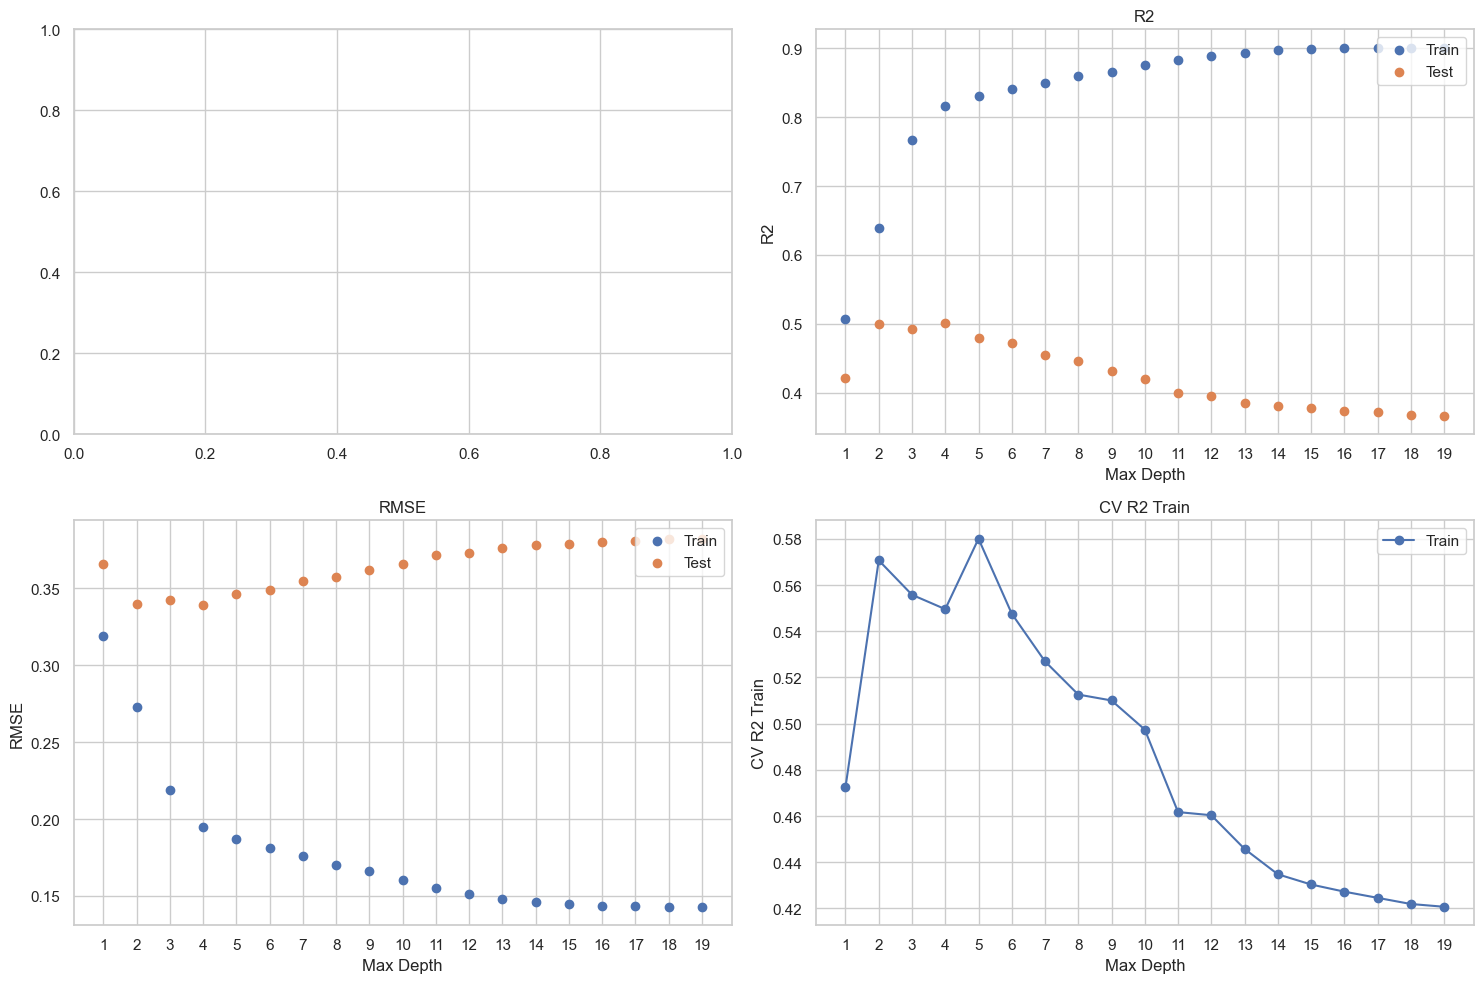

In [45]:
start_time = time.time()
# Reducir el conjunto de datos al 30%
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

# Definir el rango de profundidades
depth_range = range(1, 20)

# Listas para almacenar resultados
scores = []
r2_train_preds = []
r2_test_preds = []
rmse_train_preds = []
rmse_test_preds = []

# Listas para almacenar resultados de validación cruzada
cv_scores_train = []
cv_scores_test = []

# Configurar cuXGBoost con GPU y procesador específico
xgboost_regressor = xgboost.XGBRegressor(max_depth=depth, random_state=7, tree_method='gpu_hist', predictor='gpu_predictor')

for depth in depth_range:
    # Modelo cuXGBoost con GPU
    xgboost_regressor = xgboost.XGBRegressor(max_depth=depth, random_state=7, tree_method='gpu_hist', predictor='gpu_predictor')
    
    # Realizar validación cruzada
    cv_scores = cross_val_score(xgboost_regressor, X_train_sample, y_train_sample, cv=5, scoring='r2')
    cv_scores_train.append(cv_scores.mean())

    # Ajustar el modelo
    xgboost_regressor.fit(X_train_sample, y_train_sample)

    # Realizar predicciones
    y_train_pred = xgboost_regressor.predict(X_train_sample)
    y_test_pred = xgboost_regressor.predict(X_test)
    
    # Calcular R2 y RMSE para conjuntos de entrenamiento y prueba
    r2_train = metrics.r2_score(y_train_sample, y_train_pred)
    r2_train_preds.append(r2_train)
    
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_test_preds.append(r2_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train_sample, y_train_pred))
    rmse_train_preds.append(rmse_train)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_test_preds.append(rmse_test)

# Crear un DataFrame con los resultados
df_resultados_xgboost = pd.DataFrame({
    'Profundidad Máxima': depth_range,
    'R2 Train': r2_train_preds,
    'R2 Test': r2_test_preds,
    'RMSE Train': rmse_train_preds,
    'RMSE Test': rmse_test_preds,
    'CV R2 Train': cv_scores_train
})

# Imprimir el DataFrame
print(df_resultados_xgboost)
end_time = time.time()
execution_timeXfor = end_time - start_time
# Crear subgráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de R2
ax2.scatter(df_resultados_xgboost['Profundidad Máxima'], df_resultados_xgboost['R2 Train'], marker="o", label="Train")
ax2.scatter(df_resultados_xgboost['Profundidad Máxima'], df_resultados_xgboost['R2 Test'], marker="o", label="Test")
ax2.set_xticks(df_resultados_xgboost['Profundidad Máxima'])
ax2.legend(loc='upper right')
ax2.set_title('R2')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('R2')

# Gráfico de RMSE
ax3.scatter(df_resultados_xgboost['Profundidad Máxima'], df_resultados_xgboost['RMSE Train'], marker="o", label="Train")
ax3.scatter(df_resultados_xgboost['Profundidad Máxima'], df_resultados_xgboost['RMSE Test'], marker="o", label="Test")
ax3.set_xticks(df_resultados_xgboost['Profundidad Máxima'])
ax3.legend(loc='upper right')
ax3.set_title('RMSE')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('RMSE')

# Gráfico de R2 con Validación Cruzada
ax4.plot(df_resultados_xgboost['Profundidad Máxima'], df_resultados_xgboost['CV R2 Train'], marker="o", label="Train")
ax4.set_xticks(df_resultados_xgboost['Profundidad Máxima'])
ax4.legend(loc='upper right')
ax4.set_title('CV R2 Train')
ax4.set_xlabel('Max Depth')
ax4.set_ylabel('CV R2 Train')

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

plt.show()




## Random Forest 

In [46]:
start_time = time.time()
# Modelo de Bosque Aleatorio
rf_regressor = RandomForestRegressor(random_state=7)
rf_regressor.fit(X_train, y_train)

# Predicciones en conjuntos de entrenamiento y prueba
y_rf_train_pred = rf_regressor.predict(X_train)
y_rf_test_pred = rf_regressor.predict(X_test)

# Métricas de Evaluación
rf_MAE_train = mean_absolute_error(y_train, y_rf_train_pred)
rf_MAE_test = mean_absolute_error(y_test, y_rf_test_pred)

rf_RMSE_train = np.sqrt(mean_squared_error(y_train, y_rf_train_pred))
rf_RMSE_test = np.sqrt(mean_squared_error(y_test, y_rf_test_pred))

rf_MAPE_train = mean_absolute_percentage_error(y_train, y_rf_train_pred)
rf_MAPE_test = mean_absolute_percentage_error(y_test, y_rf_test_pred)

rf_r2_train = metrics.r2_score(y_train, y_rf_train_pred)
rf_r2_test = metrics.r2_score(y_test, y_rf_test_pred)

rf_adj_r2_train = 1 - ((1 - rf_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
rf_adj_r2_test = 1 - ((1 - rf_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

# Crear un DataFrame con las métricas de evaluación
rf_metrics_df = pd.DataFrame({
    'Conjunto': ['Entrenamiento', 'Prueba'],
    'MAE': [rf_MAE_train, rf_MAE_test],
    'RMSE': [rf_RMSE_train, rf_RMSE_test],
    'MAPE': [rf_MAPE_train, rf_MAPE_test],
    'R2': [rf_r2_train, rf_r2_test],
    'R2 Ajustado': [rf_adj_r2_train, rf_adj_r2_test]
})

# Imprimir el DataFrame
print(rf_metrics_df)
end_time = time.time()
execution_timeRF = end_time - start_time

        Conjunto       MAE      RMSE      MAPE        R2  R2 Ajustado
0  Entrenamiento  0.065925  0.087969  0.204828  0.963467     0.963459
1         Prueba  0.173191  0.222606  0.549780  0.785148     0.785129


    Profundidad Máxima  R2 Train   R2 Test  RMSE Train  RMSE Test  CV R2 Train
0                    1  0.516659  0.521513    0.319974   0.332202     0.499491
1                    2  0.735634  0.752400    0.236641   0.238969     0.632605
2                    3  0.777136  0.787118    0.217274   0.221583     0.698791
3                    4  0.790991  0.800059    0.210411   0.214743     0.717243
4                    5  0.807511  0.812822    0.201925   0.207775     0.732544
5                    6  0.820845  0.826782    0.194806   0.199877     0.745950
6                    7  0.827721  0.830334    0.191031   0.197817     0.754476
7                    8  0.831471  0.835371    0.188941   0.194859     0.757220
8                    9  0.833121  0.835833    0.188013   0.194585     0.759454
9                   10  0.834627  0.837186    0.187163   0.193782     0.759813
10                  11  0.835508  0.835966    0.186664   0.194506     0.760144
11                  12  0.836981  0.837611    0.1858

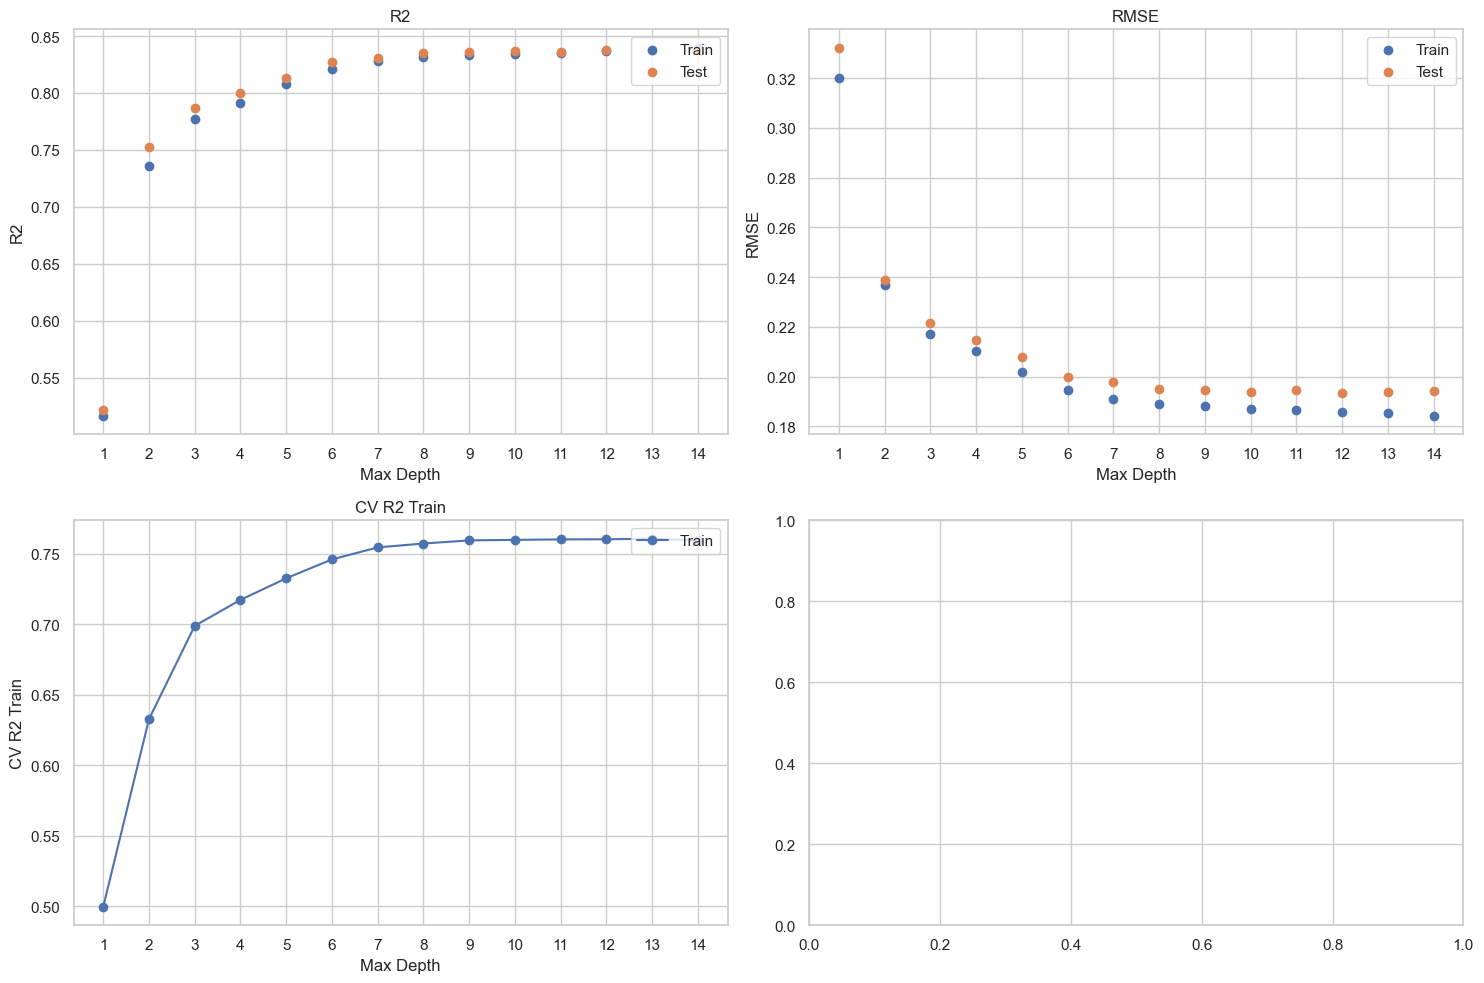

In [47]:
start_time = time.time()
# Definir el rango de profundidades
depth_range = range(1, 15)

# Listas para almacenar resultados
r2_train_preds = []
r2_test_preds = []
rmse_train_preds = []
rmse_test_preds = []

# Listas para almacenar resultados de validación cruzada
cv_scores_train = []
cv_scores_test = []

for depth in depth_range:
    # Modelo Random Forest con paralelización
    rf_regressor = RandomForestRegressor(max_depth=depth, random_state=7, n_jobs=-1)
    
    # Realizar validación cruzada
    cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=3, scoring='r2')
    cv_scores_train.append(cv_scores.mean())

    # Ajustar el modelo
    rf_regressor.fit(X_train, y_train)

    # Realizar predicciones
    y_train_pred = rf_regressor.predict(X_train)
    y_test_pred = rf_regressor.predict(X_test)
    
    # Calcular R2 y RMSE para conjuntos de entrenamiento y prueba
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_preds.append(r2_train)
    
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_test_preds.append(r2_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_train_preds.append(rmse_train)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_test_preds.append(rmse_test)

# Crear un DataFrame con los resultados
df_resultados_rf = pd.DataFrame({
    'Profundidad Máxima': depth_range,
    'R2 Train': r2_train_preds,
    'R2 Test': r2_test_preds,
    'RMSE Train': rmse_train_preds,
    'RMSE Test': rmse_test_preds,
    'CV R2 Train': cv_scores_train
})

# Imprimir el DataFrame
print(df_resultados_rf)
end_time = time.time()
execution_timeRFfor = end_time - start_time
# Crear subgráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de R2
ax1.scatter(df_resultados_rf['Profundidad Máxima'], df_resultados_rf['R2 Train'], marker="o", label="Train")
ax1.scatter(df_resultados_rf['Profundidad Máxima'], df_resultados_rf['R2 Test'], marker="o", label="Test")
ax1.set_xticks(df_resultados_rf['Profundidad Máxima'])
ax1.legend(loc='upper right')
ax1.set_title('R2')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('R2')

# Gráfico de RMSE
ax2.scatter(df_resultados_rf['Profundidad Máxima'], df_resultados_rf['RMSE Train'], marker="o", label="Train")
ax2.scatter(df_resultados_rf['Profundidad Máxima'], df_resultados_rf['RMSE Test'], marker="o", label="Test")
ax2.set_xticks(df_resultados_rf['Profundidad Máxima'])
ax2.legend(loc='upper right')
ax2.set_title('RMSE')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('RMSE')

# Gráfico de R2 con Validación Cruzada
ax3.plot(df_resultados_rf['Profundidad Máxima'], df_resultados_rf['CV R2 Train'], marker="o", label="Train")
ax3.set_xticks(df_resultados_rf['Profundidad Máxima'])
ax3.legend(loc='upper right')
ax3.set_title('CV R2 Train')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('CV R2 Train')

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

plt.show()


## KNeighbors

In [48]:
start_time = time.time()
# Reducir el conjunto de datos al 30%
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=7)

# Crear y ajustar el modelo KNN
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_sample, y_train_sample)

# Realizar predicciones en conjuntos de entrenamiento y prueba
y_knn_pred_train = knn_regressor.predict(X_train_sample)
y_knn_pred_test = knn_regressor.predict(X_test)

# Calcular métricas de evaluación
knn_MAE_train = mean_absolute_error(y_train_sample, y_knn_pred_train)
knn_MAE_test = mean_absolute_error(y_test, y_knn_pred_test)

knn_RMSE_train = np.sqrt(mean_squared_error(y_train_sample, y_knn_pred_train))
knn_RMSE_test = np.sqrt(mean_squared_error(y_test, y_knn_pred_test))

knn_MAPE_train = mean_absolute_percentage_error(y_train_sample, y_knn_pred_train)
knn_MAPE_test = mean_absolute_percentage_error(y_test, y_knn_pred_test)

knn_r2_train = metrics.r2_score(y_train_sample, y_knn_pred_train)
knn_r2_test = metrics.r2_score(y_test, y_knn_pred_test)

knn_adj_r2_train = 1 - ((1 - knn_r2_train) * (len(y_train_sample) - 1)) / (len(y_train_sample) - X_train_sample.shape[1] - 1)
knn_adj_r2_test = 1 - ((1 - knn_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

# Crear un DataFrame con las métricas de evaluación
knn_metrics_df = pd.DataFrame({
    'Conjunto': ['Entrenamiento', 'Prueba'],
    'MAE': [knn_MAE_train, knn_MAE_test],
    'RMSE': [knn_RMSE_train, knn_RMSE_test],
    'MAPE': [knn_MAPE_train, knn_MAPE_test],
    'R2': [knn_r2_train, knn_r2_test],
    'R2 Ajustado': [knn_adj_r2_train, knn_adj_r2_test]
})

# Imprimir el DataFrame
print(knn_metrics_df)
end_time = time.time()
execution_timeKNN = end_time - start_time


        Conjunto       MAE      RMSE      MAPE        R2  R2 Ajustado
0  Entrenamiento  0.135039  0.180103  0.448972  0.802150     0.802014
1         Prueba  0.167277  0.281562  0.565309  0.656272     0.656241


   Número de Vecinos  R2 Train   R2 Test  RMSE Train  RMSE Test  CV R2 Train  \
0                  1  0.998377  0.608614    0.017528   0.300448     0.497598   
1                  2  0.894912  0.648925    0.141045   0.284555     0.620871   
2                  3  0.856726  0.654835    0.164690   0.282150     0.664783   
3                  4  0.839427  0.658986    0.174349   0.280448     0.681244   
4                  5  0.828999  0.673251    0.179921   0.274520     0.688932   

   CV R2 Test  
0    0.497598  
1    0.620871  
2    0.664783  
3    0.681244  
4    0.688932  


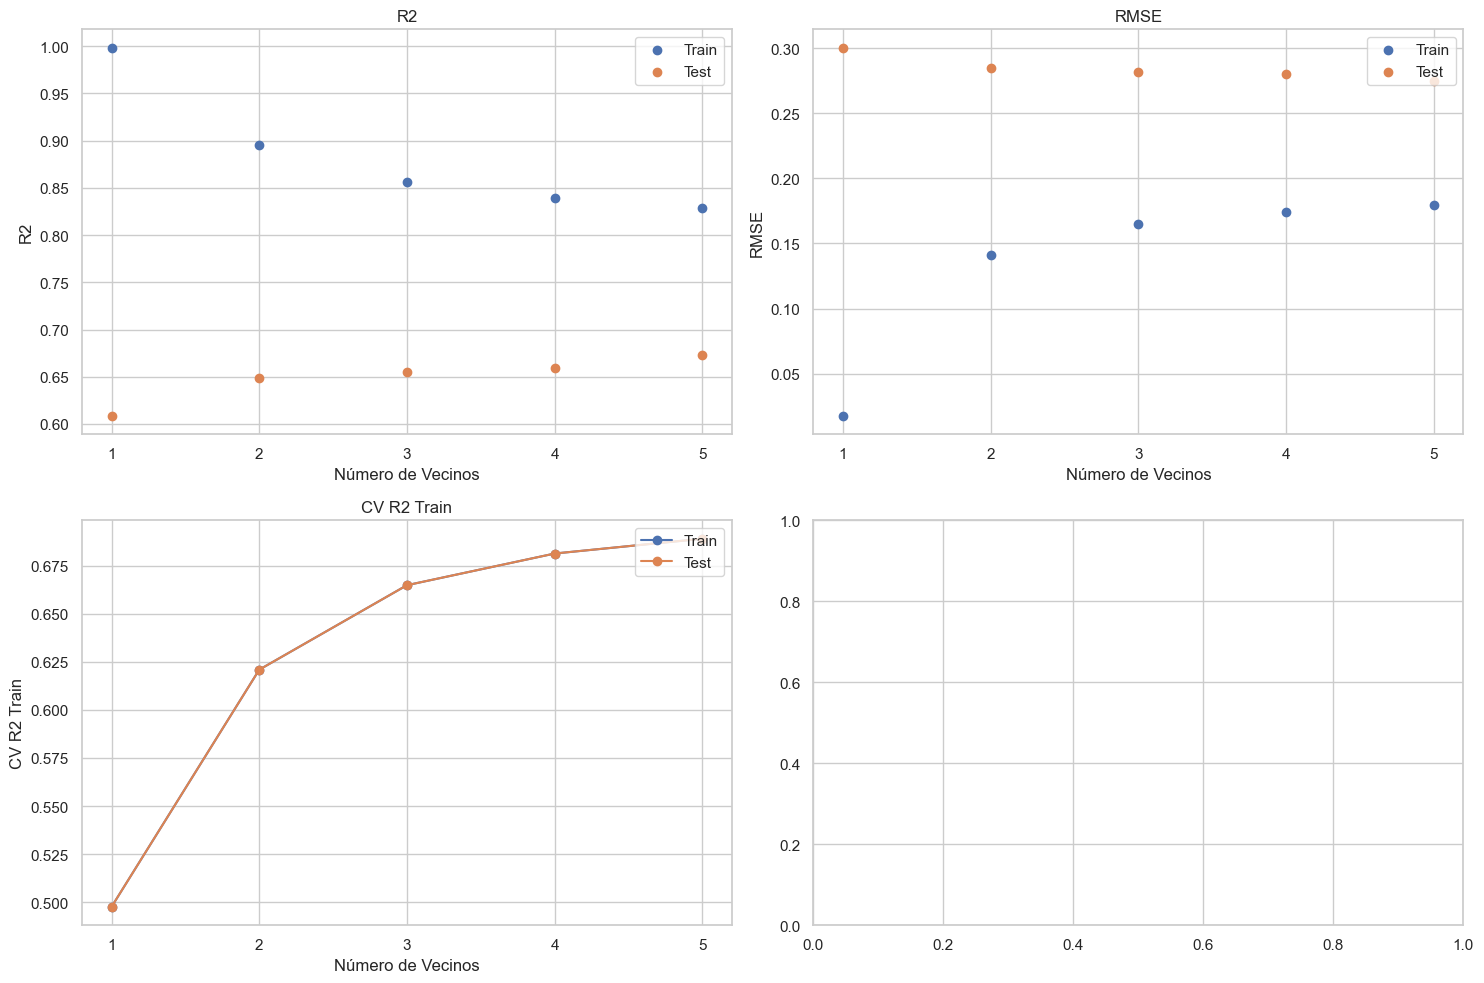

In [49]:
start_time = time.time()

# Reducir el conjunto de datos al 20%
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=7)

# Definir el rango de vecinos
neighbors_range = range(1, 6)

# Listas para almacenar resultados
r2_train_preds = []
r2_test_preds = []
rmse_train_preds = []
rmse_test_preds = []

# Listas para almacenar resultados de validación cruzada
cv_scores_train = []
cv_scores_test = []

for neighbors in neighbors_range:
    # Modelo KNN
    knn_regressor = KNeighborsRegressor(n_neighbors=neighbors)
    
    # Realizar validación cruzada
    cv_scores = cross_val_score(knn_regressor, X_train_sample, y_train_sample, cv=5, scoring='r2')
    
    # Agregar los valores a las listas
    cv_scores_train.append(cv_scores.mean())
    cv_scores_test.append(np.mean(cv_scores))  # Agregado
    
    # Ajustar el modelo
    knn_regressor.fit(X_train_sample, y_train_sample)

    # Realizar predicciones
    y_train_pred = knn_regressor.predict(X_train_sample)
    y_test_pred = knn_regressor.predict(X_test)
    
    # Calcular R2 y RMSE para conjuntos de entrenamiento y prueba
    r2_train = metrics.r2_score(y_train_sample, y_train_pred)
    r2_train_preds.append(r2_train)
    
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_test_preds.append(r2_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train_sample, y_train_pred))
    rmse_train_preds.append(rmse_train)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_test_preds.append(rmse_test)

# Crear un DataFrame con los resultados
df_resultados_knn = pd.DataFrame({
    'Número de Vecinos': neighbors_range,
    'R2 Train': r2_train_preds,
    'R2 Test': r2_test_preds,
    'RMSE Train': rmse_train_preds,
    'RMSE Test': rmse_test_preds,
    'CV R2 Train': cv_scores_train,
    'CV R2 Test': cv_scores_test  # Agregado
})

# Imprimir el DataFrame
print(df_resultados_knn)
end_time = time.time()
execution_timeKNNfor = end_time - start_time
# Crear subgráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de R2
ax1.scatter(df_resultados_knn['Número de Vecinos'], df_resultados_knn['R2 Train'], marker="o", label="Train")
ax1.scatter(df_resultados_knn['Número de Vecinos'], df_resultados_knn['R2 Test'], marker="o", label="Test")
ax1.set_xticks(df_resultados_knn['Número de Vecinos'])
ax1.legend(loc='upper right')
ax1.set_title('R2')
ax1.set_xlabel('Número de Vecinos')
ax1.set_ylabel('R2')

# Gráfico de RMSE
ax2.scatter(df_resultados_knn['Número de Vecinos'], df_resultados_knn['RMSE Train'], marker="o", label="Train")
ax2.scatter(df_resultados_knn['Número de Vecinos'], df_resultados_knn['RMSE Test'], marker="o", label="Test")
ax2.set_xticks(df_resultados_knn['Número de Vecinos'])
ax2.legend(loc='upper right')
ax2.set_title('RMSE')
ax2.set_xlabel('Número de Vecinos')
ax2.set_ylabel('RMSE')

# Gráfico de R2 con Validación Cruzada
ax3.plot(df_resultados_knn['Número de Vecinos'], df_resultados_knn['CV R2 Train'], marker="o", label="Train")
ax3.plot(df_resultados_knn['Número de Vecinos'], df_resultados_knn['CV R2 Test'], marker="o", label="Test")  # Agregado
ax3.set_xticks(df_resultados_knn['Número de Vecinos'])
ax3.legend(loc='upper right')
ax3.set_title('CV R2 Train')
ax3.set_xlabel('Número de Vecinos')
ax3.set_ylabel('CV R2 Train')

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

plt.show()


In [50]:


# Nombres de los algoritmos
algorithms = ['Arbfor', 'Arbol', 'Regresión', 'Xgboost', 'Xgfor', 'RF', 'RFfor', 'KNN', 'KNNfor']
#algorithms = ['Arbfor', 'Arbol', 'Regresión', 'Xgboost', 'Xgfor', 'RF', 'RFfor', 'KNN']
# Tiempos de ejecución correspondientes a cada algoritmo
execution_times = [execution_timeFA, execution_timeA, execution_timeL, execution_timeX,
                   execution_timeXfor, execution_timeRF, execution_timeRFfor,
                   execution_timeKNN, execution_timeKNNfor]
#execution_times = [execution_timeFA, execution_timeA, execution_timeL, execution_timeX,
#                   execution_timeXfor, execution_timeRF, execution_timeRFfor,
#                  execution_timeKNN]
# Crear un DataFrame
df_execution_times = pd.DataFrame({
    'Algoritmo': algorithms,
    'Tiempo de Ejecución (segundos)': execution_times
})

# Ordenar el DataFrame por tiempo de ejecución de mayor a menor
df_execution_times = df_execution_times.sort_values(by='Tiempo de Ejecución (segundos)', ascending=False)


# Imprimir el DataFrame
df_execution_times


,Algoritmo,Tiempo de Ejecución (segundos)
8,KNNfor,1502.255350
6,RFfor,795.684780
7,KNN,495.155822
4,Xgfor,290.527112
5,RF,251.114998
0,Arbfor,96.055380
3,Xgboost,8.616777
1,Arbol,3.779609
2,Regresión,0.344049


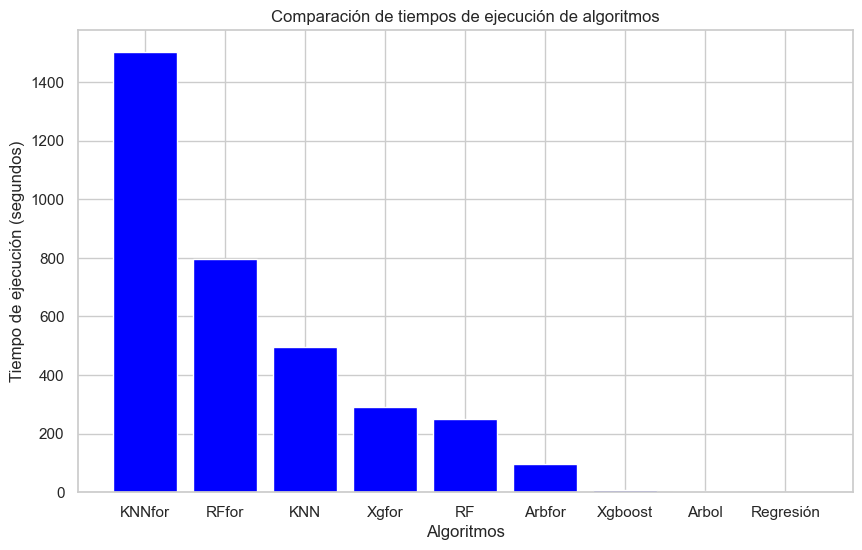

In [51]:
# Ordenar algoritmos y tiempos de mayor a menor
sorted_data = sorted(zip(execution_times, algorithms), reverse=True)
sorted_execution_times, sorted_algorithms = zip(*sorted_data)

# Crear la gráfica de barras ordenada
plt.figure(figsize=(10, 6))
plt.bar(sorted_algorithms, sorted_execution_times, color='blue')
plt.xlabel('Algoritmos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempos de ejecución de algoritmos')
plt.show()




## Predicciones

In [52]:
#Lectura de los .CSV con pandas 

omega=pd.read_csv('Parapredecir.csv')

In [53]:
omega.head()

,anio,mes,factura,matricula,ciclo,ESTRATO,BARRIO,VALOR,unidades_resd,tara_cargofijo,...,tara_tafna,tara_tafa,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal
0,2023,10,2101262,4,200,2,CENTRO,32243.124,0,36068.68,...,0.0,0,0,0,0,2,3,0,3,98140
1,2023,10,2101262,4,200,2,CENTRO,32243.124,3,36068.68,...,0.0,0,0,0,0,2,3,0,3,98140
2,2023,10,2101262,4,200,2,CENTRO,32243.124,4,36068.68,...,0.0,0,0,0,0,2,3,0,3,98140
3,2023,10,2108932,1744,403,2,EL DORADO,32243.124,0,36068.68,...,0.0,0,0,0,0,2,1,1,3,32710
4,2023,10,2110755,1676,404,2,LA CUMBRE,32243.124,0,36068.68,...,0.0,0,0,0,0,2,1,0,3,32710


In [54]:
#Normlización de los nombres de las columnas

omega.columns=omega.columns.str.lower()

#Se confirma Beta, verificando que los nombres esten en minuscula

omega.tail()

,anio,mes,factura,matricula,ciclo,estrato,barrio,valor,unidades_resd,tara_cargofijo,...,tara_tafna,tara_tafa,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal
49126,2023,9,2094033,48758,106,1,VEREDA EL PENCAL,23719.3515,0,36068.68,...,0.0245,0,0,0,0,2,1,0,2,23720
49127,2023,9,2094034,48759,106,1,VEREDA EL PENCAL,23719.3515,0,36068.68,...,0.0245,0,0,0,0,2,1,0,2,23720
49128,2023,9,2093812,49166,104,10,VEREDA EL PENCAL - VISTA HERMOSA,422123.3387,0,36068.68,...,0.0245,0,0,0,0,2,0,1,2,422120
49129,2023,9,2093813,49167,104,10,VEREDA EL PENCAL - VISTA HERMOSA,122692.2019,0,36068.68,...,0.0245,0,0,0,0,2,0,1,2,122690
49130,2023,9,2093814,49168,104,10,VEREDA EL PENCAL - VISTA HERMOSA,196912.9681,0,36068.68,...,0.0245,0,0,0,0,2,0,1,2,196910


In [55]:
#Se decriben las columnas del dataframe
omega.describe()

,anio,mes,factura,matricula,ciclo,estrato,valor,unidades_resd,tara_cargofijo,tara_porcensubsidiocontribucio,...,tara_tafna,tara_tafa,tara_aforo,tara_tca,tara_tviat,frec_barrido,info_urh,info_unrh,recoleccion,fact_valortotal
count,49131.0,49131.000000,4.913100e+04,49131.000000,49131.00000,49131.000000,4.913100e+04,49131.000000,4.913100e+04,49131.000000,...,49131.000000,49131.0,49131.0,49131.0,49131.0,49131.000000,49131.000000,49131.000000,49131.000000,4.913100e+04
mean,2023.0,9.470233,2.099412e+06,24011.990800,351.74739,3.326454,5.465624e+04,0.043353,3.606868e+04,-14.540372,...,0.023365,0.0,0.0,0.0,0.0,2.010889,0.972197,0.127414,2.670880,7.340956e+04
std,0.0,0.499118,1.422823e+04,14149.416993,183.57260,2.026795,1.818482e+05,0.260018,1.229649e-08,24.052225,...,0.037203,0.0,0.0,0.0,0.0,0.105918,0.349988,0.393577,0.475411,2.823916e+05
min,2023.0,9.000000,2.074991e+06,1.000000,101.00000,1.000000,1.685908e+04,0.000000,3.606868e+04,-55.000000,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,-1.274440e+06
25%,2023.0,9.000000,2.086682e+06,11595.500000,200.00000,2.000000,3.224312e+04,0.000000,3.606868e+04,-40.000000,...,0.000000,0.0,0.0,0.0,0.0,2.000000,1.000000,0.000000,2.000000,4.456000e+04
50%,2023.0,9.000000,2.099835e+06,23770.000000,401.00000,3.000000,4.672076e+04,0.000000,3.606868e+04,-14.000000,...,0.024500,0.0,0.0,0.0,0.0,2.000000,1.000000,0.000000,3.000000,4.740000e+04
75%,2023.0,10.000000,2.111638e+06,36393.500000,502.00000,4.000000,4.672076e+04,0.000000,3.606868e+04,0.000000,...,0.024500,0.0,0.0,0.0,0.0,2.000000,1.000000,0.000000,3.000000,5.658000e+04
max,2023.0,10.000000,2.123739e+06,49168.000000,802.00000,12.000000,2.013904e+07,7.000000,3.606868e+04,60.000000,...,0.270000,0.0,0.0,0.0,0.0,5.000000,6.000000,6.000000,6.000000,2.251425e+07


In [56]:
#Se observa la información, lo cual permite verificar que tipo de datos se tienen y cuantos registros por columna
omega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49131 entries, 0 to 49130
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   anio                            49131 non-null  int64  
 1   mes                             49131 non-null  int64  
 2   factura                         49131 non-null  int64  
 3   matricula                       49131 non-null  int64  
 4   ciclo                           49131 non-null  int64  
 5   estrato                         49131 non-null  int64  
 6   barrio                          49131 non-null  object 
 7   valor                           49131 non-null  float64
 8   unidades_resd                   49131 non-null  int64  
 9   tara_cargofijo                  49131 non-null  float64
 10  tara_porcensubsidiocontribucio  49131 non-null  int64  
 11  tara_cargovariable              49131 non-null  float64
 12  tara_cargoapv                   

In [57]:
#Se revisa la cantidad de errores NaN
omega.isna().sum()

anio                              0
mes                               0
factura                           0
matricula                         0
ciclo                             0
estrato                           0
barrio                            0
valor                             0
unidades_resd                     0
tara_cargofijo                    0
tara_porcensubsidiocontribucio    0
tara_cargovariable                0
tara_cargoapv                     0
tara_tbl                          0
tara_trt                          0
tara_tdf                          0
tara_tc                           0
tara_ta                           0
sub tra                           0
con tra                           0
tara_ttl                          0
tara_tlu                          0
tara_trna                         0
tara_tra                          0
tara_trbl                         0
tara_trlu                         0
tara_trra                         0
tara_tafna                  

In [58]:
#Se deja este espacio para tokenizar los barrios, 
le = LabelEncoder()
omega['barrio_encoded'] = le.fit_transform(omega['barrio'])

In [59]:
#Se eliminan las columnas que son de clasificación arbitraria y no realizan un aporte significativo a la predicción de las toneladas 
#Defines the tag what we want to keep in the new Df
toDontKeep=['barrio']
#Drop the unwanted data 
omega=omega.drop(labels=toDontKeep, axis=1)
omega.isna().sum()

anio                              0
mes                               0
factura                           0
matricula                         0
ciclo                             0
estrato                           0
valor                             0
unidades_resd                     0
tara_cargofijo                    0
tara_porcensubsidiocontribucio    0
tara_cargovariable                0
tara_cargoapv                     0
tara_tbl                          0
tara_trt                          0
tara_tdf                          0
tara_tc                           0
tara_ta                           0
sub tra                           0
con tra                           0
tara_ttl                          0
tara_tlu                          0
tara_trna                         0
tara_tra                          0
tara_trbl                         0
tara_trlu                         0
tara_trra                         0
tara_tafna                        0
tara_tafa                   

In [60]:
#Se procede a eliminar los NaN

omega.dropna(inplace=True)
#df2.dropna(inplace=True)
#Se revisa 
omega.isna().sum()

anio                              0
mes                               0
factura                           0
matricula                         0
ciclo                             0
estrato                           0
valor                             0
unidades_resd                     0
tara_cargofijo                    0
tara_porcensubsidiocontribucio    0
tara_cargovariable                0
tara_cargoapv                     0
tara_tbl                          0
tara_trt                          0
tara_tdf                          0
tara_tc                           0
tara_ta                           0
sub tra                           0
con tra                           0
tara_ttl                          0
tara_tlu                          0
tara_trna                         0
tara_tra                          0
tara_trbl                         0
tara_trlu                         0
tara_trra                         0
tara_tafna                        0
tara_tafa                   

In [61]:
start_time = time.time()

rf_regressor = RandomForestRegressor(max_depth=13, random_state=7, n_jobs=-1)
rf_regressor.fit(X_train, y_train)
# Predicciones en conjunto de datos nuevo (omega)
y_rf_omega_pred = rf_regressor.predict(omega)

# Crear un DataFrame con las predicciones para el conjunto de datos omega
rf_omega_predictions_df = pd.DataFrame({
    'Predicted_Ton_Mes': y_rf_omega_pred
})

# Imprimir el DataFrame con las predicciones para omega
print("Predictions for Omega:")
print(rf_omega_predictions_df)

end_time = time.time()
execution_timeRFOmega = end_time - start_time


Predictions for Omega:
       Predicted_Ton_Mes
0               0.380509
1               0.376044
2               0.376044
3               0.395049
4               0.373726
...                  ...
49126           0.458176
49127           0.458176
49128           1.271204
49129           0.544284
49130           0.755536

[49131 rows x 1 columns]


In [62]:
rf_omega_predictions_df

,Predicted_Ton_Mes
0,0.380509
1,0.376044
2,0.376044
3,0.395049
4,0.373726
...,...
49126,0.458176
49127,0.458176
49128,1.271204
49129,0.544284


In [63]:
# Se concatena al archivo original, para entrega
result_df = pd.concat([omega, rf_omega_predictions_df], axis=1)
#Se guarda
result_df.to_csv('predicted_results.csv', index=False)

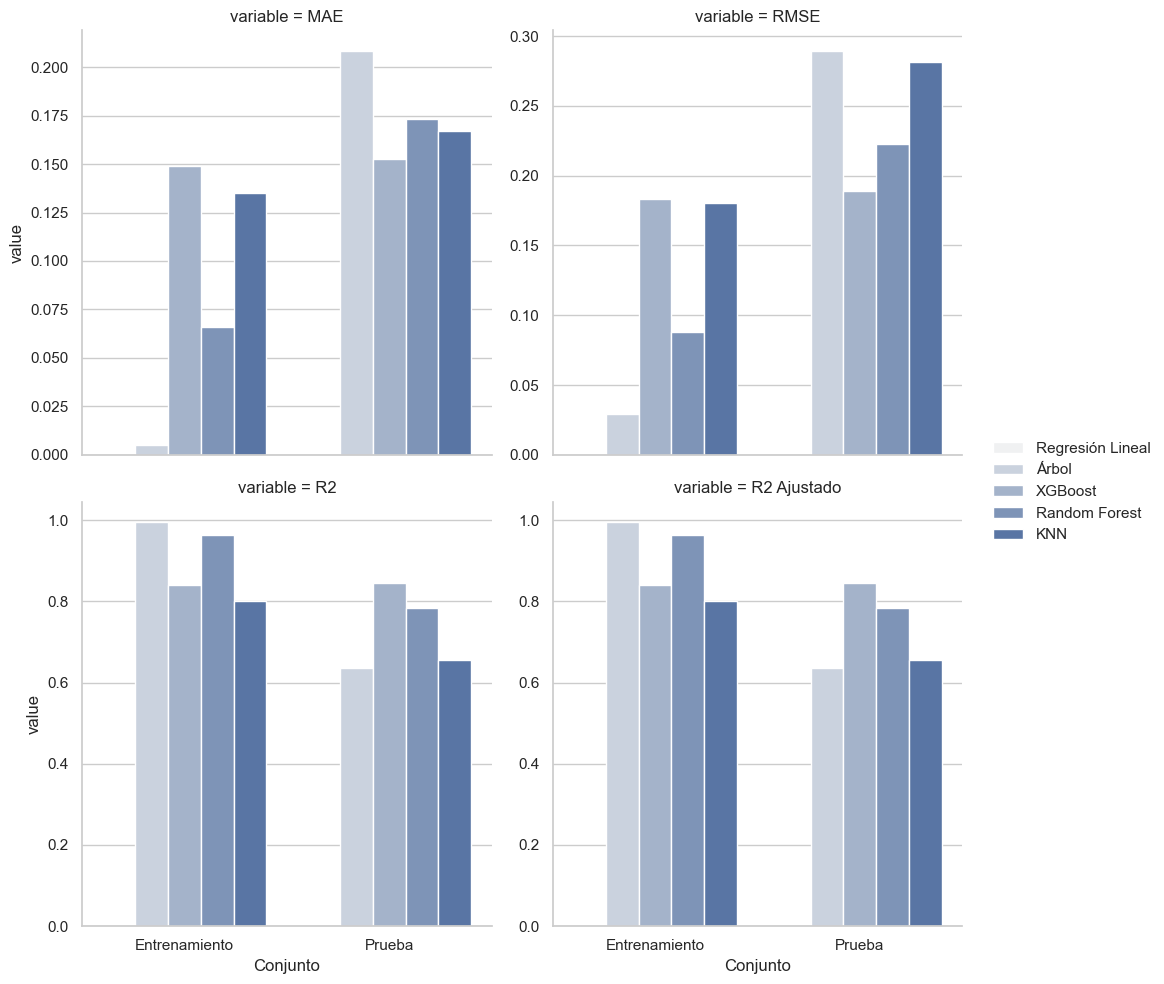

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar un identificador al DataFrame de resultados base
df_resultados_linear_regression['Modelo'] = 'Regresión Lineal'

# Agregar identificadores a los otros DataFrames
arbol_metrics_df['Modelo'] = 'Árbol'
df_metricas_xgboost['Modelo'] = 'XGBoost'
rf_metrics_df['Modelo'] = 'Random Forest'
knn_metrics_df['Modelo'] = 'KNN'

# Concatenar todos los DataFrames en uno solo
df_total = pd.concat([df_resultados_linear_regression, arbol_metrics_df, df_metricas_xgboost, rf_metrics_df, knn_metrics_df])

# Reorganizar el DataFrame usando melt
df_melted = pd.melt(df_total, id_vars=['Conjunto', 'Modelo'], value_vars=['MAE', 'RMSE', 'R2', 'R2 Ajustado'])

# Configurar el gráfico
g = sns.FacetGrid(df_melted, col='variable', col_wrap=2, height=5, sharey=False)
g.map_dataframe(sns.barplot, x='Conjunto', y='value', hue='Modelo', ci=None)
g.add_legend()
g.tight_layout()
plt.savefig('Comparacion1', dpi=300)
plt.show()

